In [1]:
#import useful libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
import scipy.stats as ss

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
hist = pd.read_csv("datasets/soft/history.csv")

hist.head()

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
0,00116D71-E87D-4B64-A566-1F29B2A798A8,7/1/17,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.7619,40,0,0,0,15,1,9,0,39,0.887446,1,1
1,00116D71-E87D-4B64-A566-1F29B2A798A8,8/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,200,28,0.887446,2,2
2,00116D71-E87D-4B64-A566-1F29B2A798A8,9/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.5000,72,0,0,0,15,1,9,0,43,0.887446,3,3
3,00116D71-E87D-4B64-A566-1F29B2A798A8,10/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8636,16,0,0,0,15,1,9,0,49,0.887446,4,4
4,00116D71-E87D-4B64-A566-1F29B2A798A8,11/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8000,8,0,0,0,15,1,9,0,43,0.887446,5,5


Employee History

Employee History data for 1.5 years, which is gathered on regular basis (ones per month)

* EmployeeID - Employee identifier
* Date - Month of Employee Statistics gathering
* DevCenterID - Employee Location in terms of Company Geography. DevCenters locate in different cities such as Kyiv, Lviv, Kharkiv, Dnipro.
* SBUID - Employee Location in terms of Company Structure. Other words, it's department in the company. Many unique values => isn't typical IT, HR, R&D, Finance. Same PositionID in different SBUID => inner separation in different centers.
1. What does Company Structure / Company Geography mean? Geographical location - coordinates, structural - company structure element
* PositionID - Identifier of Employee Position (like QC Engineer, Development Consultant, etc)
1. What positions do codes mean? Info isn't provided.
* IsTrainee - Trainee flag of Employee
* LanguageLevelID - English Level Identifier (like Intermediate low, Upper-intermediate, etc). ordered level of employee 1-Elementary and the highest is Native level;
* CustomerID - Client Identifier (one client may be related to the several projects). 
1. Is it the main client who paid for project where employee worked? Yes, it's Id of client where Employee is still working or worked.
* ProjectID - Employee Main Project Identifier
* IsInternalProject - Internal / External project flag
* Utilization - percent of Employee load on Non-Internal Projects during last month
1. Does this feature matter for employees who worked on internal project? Yes because only main project can be internal, whereas there are also other projects that are external.
2. What is the difference between an internal and an external project? Internal project - company creates own product, external project - company creates product on customer's plan.
* HourVacation - vacation hours are spent as on the last month
* HourMobileReserve - total hours in Mobile reserve as on the last month. It's hours which Employee spends in his/her Technology group without project.
* HourLockedReserve - total hours in Locked reserve as on the last month. Each manager has Team with different job roles. It's hours which Employee spends in team of his/her Manager without project.
* OnSide - was Employee involved to OnSite visit last month
1. What is on-site visit? Maybe, client's visit on place.
* MonthOnPosition - month without position changing as on the last month
* MonthOnSalary - month without salary increasing as on the last month
* CompetenceGroupID - Employee Competency Group (like QC, Big Data, Data Science, etc)
* FunctionalOfficeID - Functional Office Identifier (like SDO (Software Development), QMO (Quality Management Office), etc). Maybe, competency groups are parts of functional offices
* PaymentTypeId - Payment with respect to the country-specifics employment
1. What is it? Type of Employees indentity: FOP, contract, usual employee
* WageGross - Compensation GROSS
1. Why is a wage gross given in percents? It is anonymized gross compensation. Treat as salary.
* BonusOneTime - One Time Bonus
1. Month salary bonus? Maybe.
* APM - Employee APM.
1. What is it?  ACHIEVABLE PROFIT MARGIN. Approximate explanation looks like https://www.performlaw.com/hubfs/Pdf/Achievable_Profit_Margin_Analysis.pdf?t=1501943820897
* PositionLevel - Employee Seniority Level (Junior, Middle, Senior, etc). PositionLevelID is also ordered 1-Junior, 9-11 Managers levels.

In [14]:
hist.dtypes

EmployeeID             object
Date                   object
DevCenterID             int64
SBUID                   int64
PositionID              int64
PositionLevel           int64
IsTrainee               int64
LanguageLevelID         int64
CustomerID             object
ProjectID              object
IsInternalProject       int64
Utilization           float64
HourVacation            int64
HourMobileReserve       int64
HourLockedReserve       int64
OnSite                  int64
CompetenceGroupID       int64
FunctionalOfficeID      int64
PaymentTypeId           int64
BonusOneTime            int64
APM                     int64
WageGross             float64
MonthOnPosition         int64
MonthOnSalary           int64
dtype: object

In [5]:
hist['Date'] = pd.to_datetime(hist['Date'], format='%m/%d/%y')
hist['Date'].head()

0   2017-07-01
1   2017-08-01
2   2017-09-01
3   2017-10-01
4   2017-11-01
Name: Date, dtype: datetime64[ns]

In [16]:
np.where(hist.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [17]:
hist.isnull().sum(axis=0)

EmployeeID               0
Date                     0
DevCenterID              0
SBUID                    0
PositionID               0
PositionLevel            0
IsTrainee                0
LanguageLevelID          0
CustomerID               0
ProjectID             6017
IsInternalProject        0
Utilization              0
HourVacation             0
HourMobileReserve        0
HourLockedReserve        0
OnSite                   0
CompetenceGroupID        0
FunctionalOfficeID       0
PaymentTypeId            0
BonusOneTime             0
APM                      0
WageGross                0
MonthOnPosition          0
MonthOnSalary            0
dtype: int64

In [4]:
emp = pd.read_csv('datasets/soft/employees.csv')

emp.head()

,EmployeeID,HiringDate,DismissalDate
0,01EDC1A7-5DA7-4939-854B-0002E0DF548D,9/1/18,NaN
1,91C351D9-38A1-40CB-9B69-000774211859,1/1/18,2/1/19
2,D699327D-8A78-4FBE-9CEA-001355717D3F,2/1/18,NaN
3,22102E27-5EEA-44F9-8632-0017B04B1236,10/1/14,5/1/18
4,08C0AFA9-ABC3-4FAF-8DE2-0018AE9A69F4,9/1/10,NaN


Employee

Information about Employee employment

EmployeeID - Employee identifier
HiringDate - Date of Hiring
DismissalDate - Date of Dismissal

In [19]:
emp[emp['EmployeeID'] == '0040B626-4578-4C4B-B3CB-42270CEAFF6C']

,EmployeeID,HiringDate,DismissalDate
1462,0040B626-4578-4C4B-B3CB-42270CEAFF6C,1/1/18,7/1/18


In [20]:
hist[hist['EmployeeID'] == '22102E27-5EEA-44F9-8632-0017B04B1236']

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
10902,22102E27-5EEA-44F9-8632-0017B04B1236,2017-07-01,4,296,203,2,0,11,F4171AFC-D109-40F0-B198-EF28840EC345,9D40FAC6-EEA0-4322-8FA6-17C605AC43C0,0,0.6190,64,0,0,0,22,0,9,0,-71,1.140200,1,1
10903,22102E27-5EEA-44F9-8632-0017B04B1236,2017-08-01,4,296,203,2,0,11,F4171AFC-D109-40F0-B198-EF28840EC345,AC3D39E7-6914-4609-8787-5AB7837FCD98,0,0.4500,0,0,0,0,22,0,9,0,-41,1.140200,2,2
10904,22102E27-5EEA-44F9-8632-0017B04B1236,2017-09-01,4,296,203,2,0,11,F4171AFC-D109-40F0-B198-EF28840EC345,AC3D39E7-6914-4609-8787-5AB7837FCD98,0,0.4148,0,0,0,0,22,0,9,0,-85,1.140200,3,3
10905,22102E27-5EEA-44F9-8632-0017B04B1236,2017-10-01,4,296,203,2,0,11,F4171AFC-D109-40F0-B198-EF28840EC345,562568D1-E507-4CA0-BAFF-78D7DB2FCC7A,0,0.0455,8,0,0,0,22,0,9,0,-584,1.140200,4,4
10906,22102E27-5EEA-44F9-8632-0017B04B1236,2017-11-01,4,296,203,2,0,11,F4171AFC-D109-40F0-B198-EF28840EC345,69A9565B-E62C-492A-B24F-D24BF5DBBC15,0,0.2500,0,8,0,0,22,0,9,0,-62,1.140200,5,5
10907,22102E27-5EEA-44F9-8632-0017B04B1236,2017-12-01,4,309,203,2,0,11,76416C73-7767-494C-951A-0D4BC62B7557,69A9565B-E62C-492A-B24F-D24BF5DBBC15,0,1.0000,0,0,0,0,22,0,9,0,50,1.140200,6,6
10908,22102E27-5EEA-44F9-8632-0017B04B1236,2018-01-01,4,309,203,2,0,11,76416C73-7767-494C-951A-0D4BC62B7557,69A9565B-E62C-492A-B24F-D24BF5DBBC15,0,1.0000,0,0,0,0,22,0,9,0,57,1.140200,7,7
10909,22102E27-5EEA-44F9-8632-0017B04B1236,2018-02-01,4,309,203,2,0,11,76416C73-7767-494C-951A-0D4BC62B7557,69A9565B-E62C-492A-B24F-D24BF5DBBC15,0,0.9500,8,0,0,0,22,0,9,0,28,1.089649,8,8
10910,22102E27-5EEA-44F9-8632-0017B04B1236,2018-03-01,4,309,203,2,0,11,76416C73-7767-494C-951A-0D4BC62B7557,69A9565B-E62C-492A-B24F-D24BF5DBBC15,0,0.7500,16,0,0,0,22,0,9,0,28,1.089649,9,9
10911,22102E27-5EEA-44F9-8632-0017B04B1236,2018-04-01,4,309,4,3,0,11,76416C73-7767-494C-951A-0D4BC62B7557,69A9565B-E62C-492A-B24F-D24BF5DBBC15,0,1.0000,0,0,0,0,22,0,9,0,44,1.190751,1,1


In [21]:
emp[emp['DismissalDate'].isna()].shape

(4356, 3)

In [22]:
sum(emp['EmployeeID'].duplicated())

0

In [23]:
emp.dtypes

EmployeeID       object
HiringDate       object
DismissalDate    object
dtype: object

In [24]:
emp.isnull().sum(axis=0)

EmployeeID          0
HiringDate          0
DismissalDate    4356
dtype: int64

In [25]:
sub = pd.read_csv('datasets/soft/submission.csv')

sub.head()

,EmployeeID,target
0,00116D71-E87D-4B64-A566-1F29B2A798A8,0
1,0034ECA4-0562-4AC7-A826-4AE81C64D69F,0
2,00384806-F711-41BA-A924-8F27E996F891,0
3,005B5FD6-FD19-4924-98E4-4C06F7F6BF2C,0
4,0061CAE7-B123-46B0-9BF7-E1E94E9AD80B,0


In [26]:
sub['target'].unique()

array([0])

In [27]:
sub.shape

(4156, 2)

In [28]:
sub.dtypes

EmployeeID    object
target         int64
dtype: object

In [29]:
sub.isnull().sum(axis=0)

EmployeeID    0
target        0
dtype: int64

In [30]:
# feat = emp[['EmployeeID']].copy()
# feat['Dismissed'] = (~emp['DismissalDate'].isna()).astype('int64')
# # print(feat.head())

# mean_cols = []
# last_month_cols = ['EmployeeID', 'PositionLevel', 'IsTrainee', 
#                    'CompetenceGroupID', 'PaymentTypeId', 'MonthOnPosition', 
#                    'MonthOnSalary',
#                    'WageGross', 'Utilization', 'HourVacation', 'BonusOneTime']

# df = hist.groupby('EmployeeID').tail(3)
# feat = pd.merge(feat, df.groupby('EmployeeID').mean()[mean_cols].reset_index(drop=False), 
#                 on='EmployeeID')
# feat = pd.merge(feat, df.groupby('EmployeeID').tail(1)[last_month_cols], on='EmployeeID')

# df = hist.groupby('EmployeeID').apply(lambda x: (max(x['PositionLevel']) - min(x['PositionLevel'])) / x.shape[0]).reset_index(drop=False)
# df.rename(columns={0: 'GrowthRate'}, inplace=True)
# feat = pd.merge(feat, df,
#                 on='EmployeeID')

# df = feat

# df.head()

In [31]:
# for col in [col for col in df.columns if col != 'EmployeeID']:
#     df[col].hist()
#     plt.title(col)
#     plt.show()

In [32]:
cat_cols = ['IsTrainee', 'CompetenceGroupID', 'PaymentTypeId', 'PositionLevel', 'LanguageLevelID',
            'DevCenterID', 'SBUID', 'PositionID', 'CustomerID', 'ProjectID', 'IsInternalProject', 
            'OnSite', 'FunctionalOfficeID']
num_cols = ['WageGross', 'Utilization', 'HourVacation', 'BonusOneTime', 'MonthOnPosition', 
            'MonthOnSalary']

In [33]:
# df = hist

# for col in cat_cols:
#     _, uniqs = pd.factorize(df[col])
#     print(f'Unique values for {col}: {uniqs}')

Unique values for IsTrainee: Int64Index([0, 1], dtype='int64')
Unique values for CompetenceGroupID: Int64Index([15, 23,  0, 16, 17, 36, 31, 29, 20, 21, 19, 22, 33, 39, 32, 25, 35,
            28, 24, 37, 27, 40, 34, 26, 41],
           dtype='int64')
Unique values for PaymentTypeId: Int64Index([9, 22, 1, 3, 21, 20, 4, 10, 15, 19, 8, 16, 5, 13, 12, 14, 18, 11], dtype='int64')
Unique values for PositionLevel: Int64Index([2, 3, 1, 10, 4, 8, 5, 6, 7, 9], dtype='int64')
Unique values for LanguageLevelID: Int64Index([11, 20, 5, 15, 19, 18, 13, 10, 9, 23, 0, 1, 14, 7, 3, 6, 24, 26], dtype='int64')
Unique values for DevCenterID: Int64Index([ 3,  1,  2,  5, 10,  8, 13, -1,  0,  4, 16, 18, 36,  9, 14, 20, 32,
            35, 34,  6, 31, 19, 33, 30, 12],
           dtype='int64')
Unique values for SBUID: Int64Index([292, 332, 284,  55, 120, 272, 308, 352, 330, 255,
            ...
            412, 273, 417, 439, 355, 421, 222, 410, 422, 297],
           dtype='int64', length=169)
Unique values fo

In [34]:
# cat_prod = list(product(cat_cols + ['Dismissed'], cat_cols + ['Dismissed'], repeat=1))

# chi_res = []
# cram_res = []
# for i in cat_prod:
#     if i[0] != i[1]:
#         chi_res.append((i[0], i[1],
#                       list(ss.chi2_contingency(pd.crosstab(df[i[0]], df[i[1]])))[1]))
#         cram_res.append((i[0], i[1],
#                         ss.contingency.association(pd.crosstab(df[i[0]], df[i[1]]))))

# chi_df = pd.DataFrame(chi_res, columns = ["var1", "var2", "coeff"])
# cram_df = pd.DataFrame(cram_res, columns = ["var1", "var2", "coeff"])
# chi_df = chi_df.pivot(index = "var1", columns = "var2", values = "coeff")
# cram_df = cram_df.pivot(index = "var1", columns = "var2", values = "coeff")

# sns.heatmap(cram_df, annot = True, cmap = 'Reds')
# plt.show()
# sns.heatmap(chi_df, annot = True, cmap = 'Reds')
# plt.show()

In [35]:
# assoc_mat = cram_df
# sign_mat = chi_df

# assoc_thr = 0.3
# sign_thr = 0.05

# tril_mat = assoc_mat.copy().to_numpy()
# triu_idx = np.triu_indices(tril_mat.shape[0])
# tril_mat[triu_idx] = 0
# assoc_idx = np.column_stack(np.where(tril_mat >= assoc_thr))
# assoc_info = list()
# for r, c in assoc_idx:
#     sign_val = sign_mat.iat[r, c]
#     assoc_val = assoc_mat.iat[r, c]
#     if sign_val <= sign_thr:
#         assoc_info.append((assoc_mat.index[r], assoc_mat.columns[c], assoc_val, sign_val))
# assoc_info = pd.DataFrame(assoc_info, columns = ["f1", "f2", "cramer", "p_val"])
# print(assoc_info.sort_values(by=["f1"], ascending=False, axis=0))

# print("---------------------------")

# sel_features = ['PaymentTypeId']

# print('Dismissed')
# f_info = assoc_info[(assoc_info["f2"] == 'Dismissed') | (assoc_info["f1"] == 'Dismissed')]
# print(f_info.sort_values(by=["cramer"], ascending=False, axis=0))

# print("---------------------------")

# for f in sel_features:
#     f_info = assoc_info[((assoc_info["f1"] == f) & (assoc_info["f2"].isin(sel_features)))]
#     print(f)
#     print(f_info.sort_values(by=["cramer"], ascending=False, axis=0))
    
#     print("---------------------------")

In [36]:
# corr_mat = df[num_cols + ['Dismissed']].corr()

# sns.set(rc = {'figure.figsize':(10,10)})
# sns.heatmap(corr_mat, annot=True, cmap='Reds')
# plt.show()

In [37]:
# corr_thr = 0.2

# tril_mat = corr_mat.copy().to_numpy()
# triu_idx = np.triu_indices(tril_mat.shape[0])
# tril_mat[triu_idx] = 0
# corr_idx = np.column_stack(np.where(tril_mat >= corr_thr))
# corr_info = list()
# for r, c in corr_idx:
#     corr_val = corr_mat.iat[r, c]
#     corr_info.append((corr_mat.index[r], corr_mat.columns[c], corr_val))
# corr_info = pd.DataFrame(corr_info, columns = ["f1", "f2", "pearson"])
# print(corr_info.sort_values(by=["pearson"], ascending=False, axis=0))

# print("---------------------------")

# sel_features = []

# print('Dismissed')
# f_info = corr_info[(corr_info["f2"] == 'Dismissed') | (corr_info["f1"] == 'Dismissed')]
# print(f_info.sort_values(by=["pearson"], ascending=False, axis=0))

# print("---------------------------")

# for f in sel_features:
#     f_info = assoc_info[((assoc_info["f1"] == f) & (assoc_info["f2"].isin(sel_features)))]
#     print(f)
#     print(f_info.sort_values(by=["pearson"], ascending=False, axis=0))
    
#     print("---------------------------")

In [38]:
# for col in num_cols:
#     sns.boxplot(x=df['Dismissed'], y=df[col])
#     plt.show()

In [39]:
# sns.boxplot(x=df['Dismissed'], y=df['MonthOnSalary'])
# plt.show()

# res = ss.pearsonr(df['Dismissed'], df['MonthOnSalary'])
# print(res)

# correlation is small because we have small values in arrays? no, because we normalize
# because many values are same for both groups

In [40]:
# ss.bartlett(df[df['Dismissed'] == 0]['MonthOnSalary'], df[df['Dismissed'] == 1]['MonthOnSalary'])

# sample aren't of same size
# can reject H0 => Kruskal-Wallis Test

Generated features:
* WageQuant (numerical) - quantile of wages in which current wage lies. Wages are grouped by (PositionID, PositionLevel).
* TimeWageRate (numerical) - quantile of rates of wage growth over all time. Rates are grouped by (PositionID, PositionLevel).  
Wage doesn't become bigger.
* LastLevelPeriod (numerical) - number of months person is on the last level on last position.  
Too long on one level.
* RestLevel (ordinal) - how many levels employee has to the top level in the current position. Levels are grouped by PositionID.  
Don't have space to growth.
* MeanBonus (numerical) - quantile of mean bonuses in which mean bonus for current employee lies. Bonuses are grouped by (PositionID, PositionLevel).  
1, 2, 3 - number of employee's position. 1 - last position, 2 - previous before it and so on.  
0 - wasn't on position with this number.
* MonthsOnProject (numerical) - number of months spent on the last project.  
Too long on project, become bored.
* PosChanges (numerical) - number of a position changes during the employee's career.  
If many changes, unstable.
* FormerPosMonths (numerical) - number of months spent on previous position.  
If spent long time on previous position and changed, may be searching for changes in the life. Unstable, can leave.  
0 - wasn't previous position or wasn't long on previous position.
* MeanHourVacation (numerical) - mean number of vacation hours per user.  
Employees who don't ret may born out quicklier.
* PosLangLevel (ordinal) - level of English relative to position mode level.  
Different positions demand different knowledge of English. This parameter shows suitness of English level for current position. Can be used to compare employees from all positions.  
100 - wasn't on position with this number.
* ProjPosCount (numerical) - number of people with same position on project.  
If a person is alone on the project, he may feel bored.  
Nan if ProjectID = NaN.

In [41]:
feat = emp[['EmployeeID']].copy()
feat['Dismissed'] = (~emp['DismissalDate'].isna()).astype('int64')
feat = feat.set_index('EmployeeID')
feat = feat.sort_index()

feat.head()

,Dismissed
EmployeeID,
00116D71-E87D-4B64-A566-1F29B2A798A8,0
001502BB-B61A-404D-8A99-CC5DE5A4F985,1
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A,0
0034ECA4-0562-4AC7-A826-4AE81C64D69F,0
00384806-F711-41BA-A924-8F27E996F891,0


In [5]:
def get_quants_quant(cur_value, quants):
    if quants.iloc[2] == 0:
        return 0

    if cur_value < quants.iloc[0]:
        cur_quant = 1
    elif quants.iloc[0] <= cur_value < quants.iloc[1]:
        cur_quant = 2
    elif quants.iloc[1] <= cur_value < quants.iloc[2]:
        cur_quant = 3
    else:
        cur_quant = 4
    return cur_quant

def get_quantile(cur_value, values):
    quants = values.quantile([0.25,0.5,0.75])
    return get_quants_quant(cur_value, quants)

In [6]:
df = hist.groupby('EmployeeID').apply(lambda x: x.iloc[0:x.shape[0]-1])
# display(df[df['EmployeeID'] == '00116D71-E87D-4B64-A566-1F29B2A798A8'])
# display(hist[hist['EmployeeID'] == '00116D71-E87D-4B64-A566-1F29B2A798A8'])
df = df.reset_index(drop=True)
# display(df[df['EmployeeID'] == '00116D71-E87D-4B64-A566-1F29B2A798A8'])

In [48]:
# mb, uncomment later
# def find_pos_quantiles(pos_df, full_df, only_last_position=True):
#     # split on EmployeeID and get last observation
#     last_df = pos_df.groupby('EmployeeID').tail(1)
#     # for each last observation
#     emp_quants = list()
#     for _, row in last_df.iterrows():
#         # check if it is last observation for current employee
#         if only_last_position and (full_df[full_df['EmployeeID'] 
#                                          == row['EmployeeID']].tail(1)['Date'].iloc[0]) != row['Date']:
#             continue
#         # get wages for date of the observation
#         # find quantile of the observation
#         cur_wage = row['WageGross']
#         wages = pos_df[pos_df['Date'] == row['Date']]['WageGross']
#         cur_quant = get_quantile(cur_wage, wages)
#         emp_quants.append((row['EmployeeID'], cur_quant))
#     # return df with quantiles
#     return pd.DataFrame(emp_quants,
#                         columns=['EmployeeID', 'WageQuant'])

# # split on PositionID, PositionLevel and apply function
# wage_quant = df.groupby(['PositionID', 'PositionLevel']).apply(find_pos_quantiles, full_df=df)
# wage_quant.reset_index(drop=True, inplace=True)
# wage_quant = wage_quant.set_index('EmployeeID')
# wage_quant = wage_quant.sort_index()

# print(wage_quant.head())

# print(f'Length: {wage_quant.shape[0]}\n')

                                     WageQuant
EmployeeID                                    
00116D71-E87D-4B64-A566-1F29B2A798A8         3
001502BB-B61A-404D-8A99-CC5DE5A4F985         1
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A         4
0034ECA4-0562-4AC7-A826-4AE81C64D69F         3
00384806-F711-41BA-A924-8F27E996F891         1
Length: 5373



,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,WageRank
546,0165D804-D58C-4503-97E1-ED68D145FDC6,2017-07-01,3,271,5,4,0,18,32ED1CFE-C320-4734-9DFB-AC4B8EF88913,D6928D6F-88F5-4D5B-B391-D9C98FD12EB6,0,0.8571,24,0,0,0,21,0,9,330,26,1.651268,1,1,low
547,0165D804-D58C-4503-97E1-ED68D145FDC6,2017-08-01,3,271,5,4,0,18,32ED1CFE-C320-4734-9DFB-AC4B8EF88913,D6928D6F-88F5-4D5B-B391-D9C98FD12EB6,0,1.0000,0,0,0,0,21,0,9,290,32,1.651268,2,2,low
548,0165D804-D58C-4503-97E1-ED68D145FDC6,2017-09-01,3,271,5,4,0,18,32ED1CFE-C320-4734-9DFB-AC4B8EF88913,D6928D6F-88F5-4D5B-B391-D9C98FD12EB6,0,0.5455,80,0,0,0,21,0,9,200,31,1.651268,3,3,low
549,0165D804-D58C-4503-97E1-ED68D145FDC6,2017-10-01,3,271,5,4,0,18,32ED1CFE-C320-4734-9DFB-AC4B8EF88913,D6928D6F-88F5-4D5B-B391-D9C98FD12EB6,0,1.0000,0,0,0,0,21,0,9,410,32,1.651268,4,4,low
550,0165D804-D58C-4503-97E1-ED68D145FDC6,2017-11-01,3,271,5,4,0,18,32ED1CFE-C320-4734-9DFB-AC4B8EF88913,D6928D6F-88F5-4D5B-B391-D9C98FD12EB6,0,1.0000,0,0,0,0,21,0,9,430,26,1.651268,5,5,low


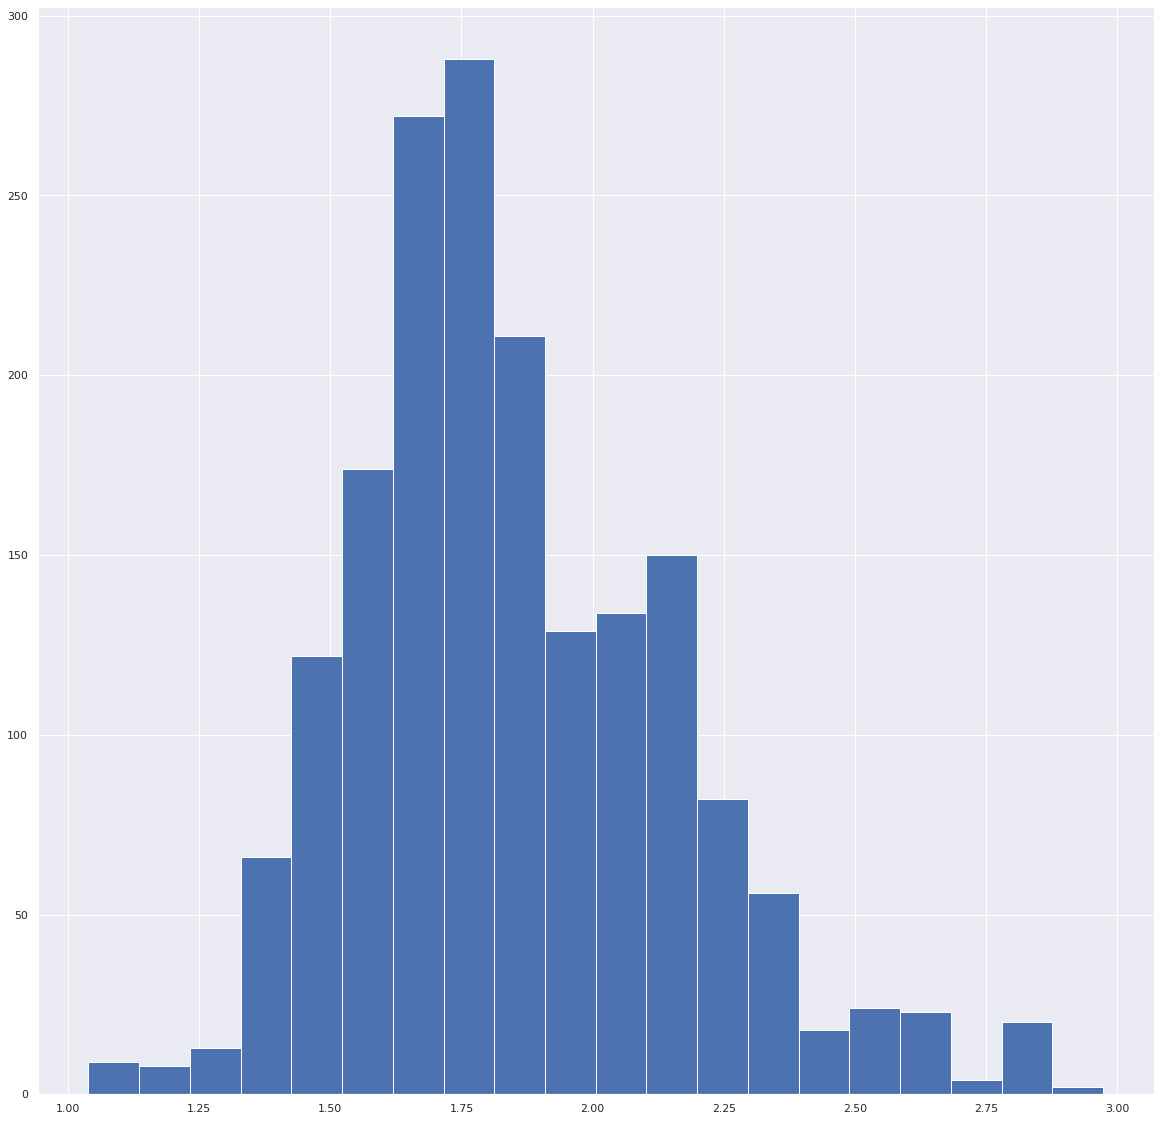

In [79]:
# df.groupby(['PositionID', 'PositionLevel']).apply(lambda x: x['WageGross'].describe())
# from 1.6 to 2.1 => large difference

df[(df['PositionID'] == 5) & (df['PositionLevel'] == 4) & (df['WageGross'].between(1, 3))]['WageGross'].hist(bins=20)

low_df = df[(df['PositionID'] == 5) & (df['PositionLevel'] == 4) & (df['WageGross'].between(1.4, 1.7))].copy()
low_df['WageRank'] = 'low'
high_df = df[(df['PositionID'] == 5) & (df['PositionLevel'] == 4) & (df['WageGross'].between(2.1, 2.3))].copy()
high_df['WageRank'] = 'high'

wage_df = pd.concat([low_df, high_df], axis=0)
wage_df.head()

In [90]:
# need sort by Date
# prev_last_wage_df = wage_df.groupby('EmployeeID').tail(1)
# prev_last_wage_df = prev_last_wage_df.set_index('EmployeeID').sort_index()
# prev_last_wage_df.head()

In [91]:
last_wage_df = wage_df.groupby('EmployeeID').apply(lambda x: x.sort_values('Date').tail(1))
last_wage_df = last_wage_df.set_index('EmployeeID')
last_wage_df = last_wage_df.sort_index()
last_wage_df.head()

,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,WageRank
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,
0165D804-D58C-4503-97E1-ED68D145FDC6,2017-12-01,3,271,5,4,0,18,32ED1CFE-C320-4734-9DFB-AC4B8EF88913,D6928D6F-88F5-4D5B-B391-D9C98FD12EB6,0,1.0000,0,0,0,0,21,0,9,350,27,1.651268,6,6,low
01CA4274-3E4F-46BA-AA4F-516795D193D7,2019-01-01,1,290,5,4,0,20,019AB39D-D631-401D-B138-5786DC390D0E,72556CF1-6FC8-4EB5-8B23-8FD1DD90C3FE,0,1.0000,0,0,0,0,21,0,22,90,37,1.659356,19,9,low
01DDE66C-877E-47FE-A9B0-75570D9FF3DF,2018-07-01,2,255,5,4,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,CFEF9674-13E7-4698-B6DE-690DA3ECD797,1,0.0000,0,168,0,0,32,7,22,0,0,1.608805,1,13,low
0431595B-280D-4D07-A3CD-0228534D6335,2018-05-01,2,295,5,4,0,20,46E885C4-C2C1-4291-A1D5-6032B4B2C654,45094D31-A818-4046-BEF9-30B81ED83AB8,0,1.0000,0,0,0,0,22,0,9,0,41,1.696258,11,10,low
077B8D5A-D649-4C57-BA7D-73621F72B670,2018-11-01,1,483,5,4,0,18,CCA559DB-BDAE-428C-8F37-E9BEC322CB50,E8BD6EB9-8990-4E9E-8FEF-3DC34FA9BEAA,0,1.0329,8,0,0,0,22,0,22,0,52,2.196710,14,1,high


In [92]:
# last_wage_df.compare(prev_last_wage_df)
# sort dates as strings! => fix all dtypes and rerun feature set generation

In [93]:
# wage_df[wage_df['EmployeeID'] == '4BA1DC06-3F4A-4914-A4A8-73BC192E8E83'].sort_values('Date')

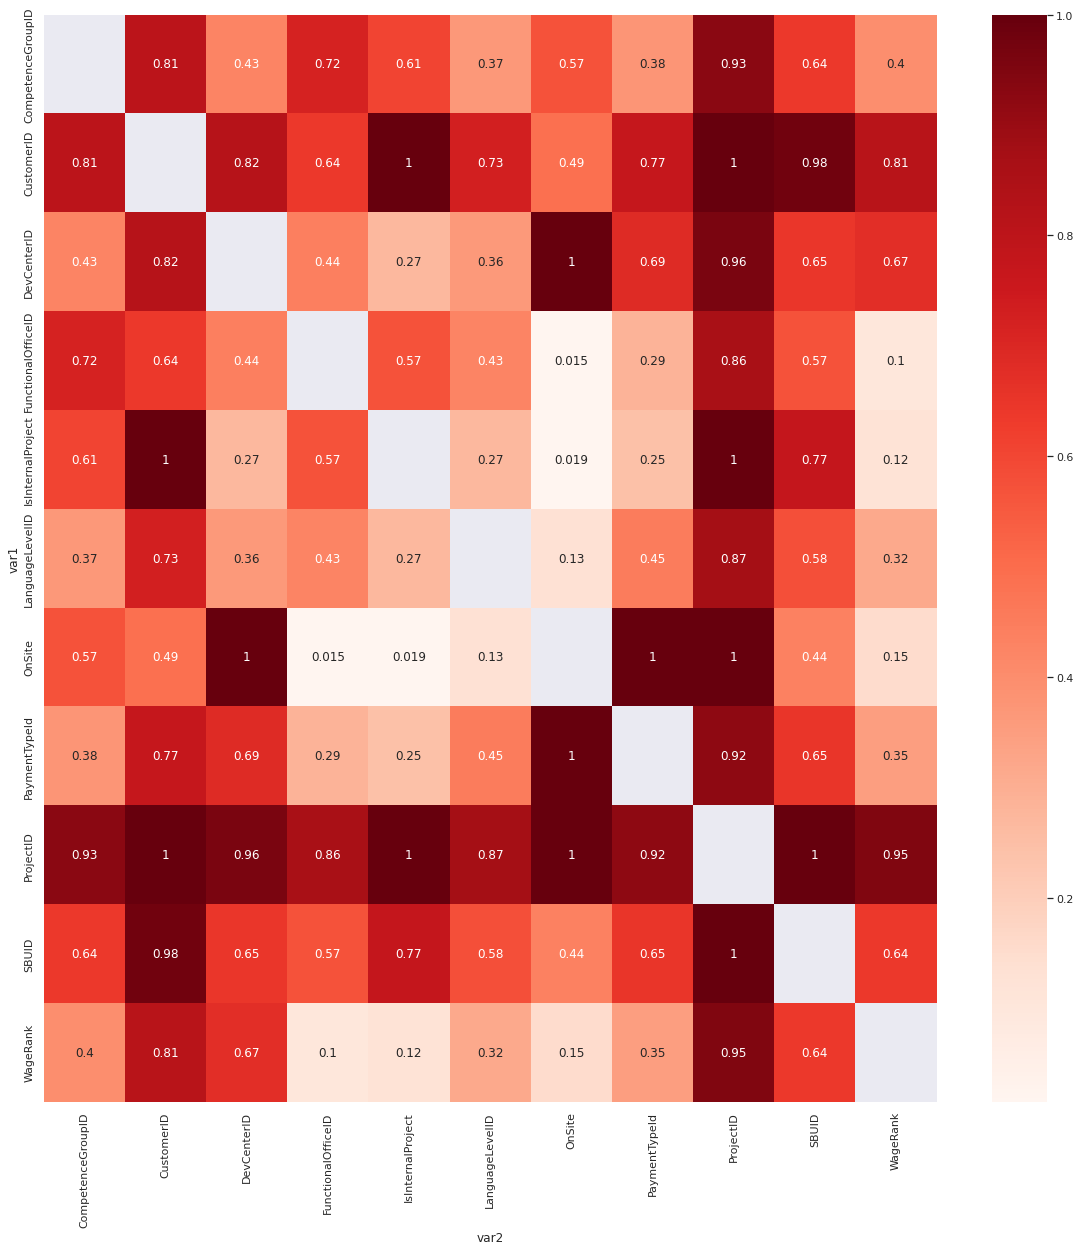

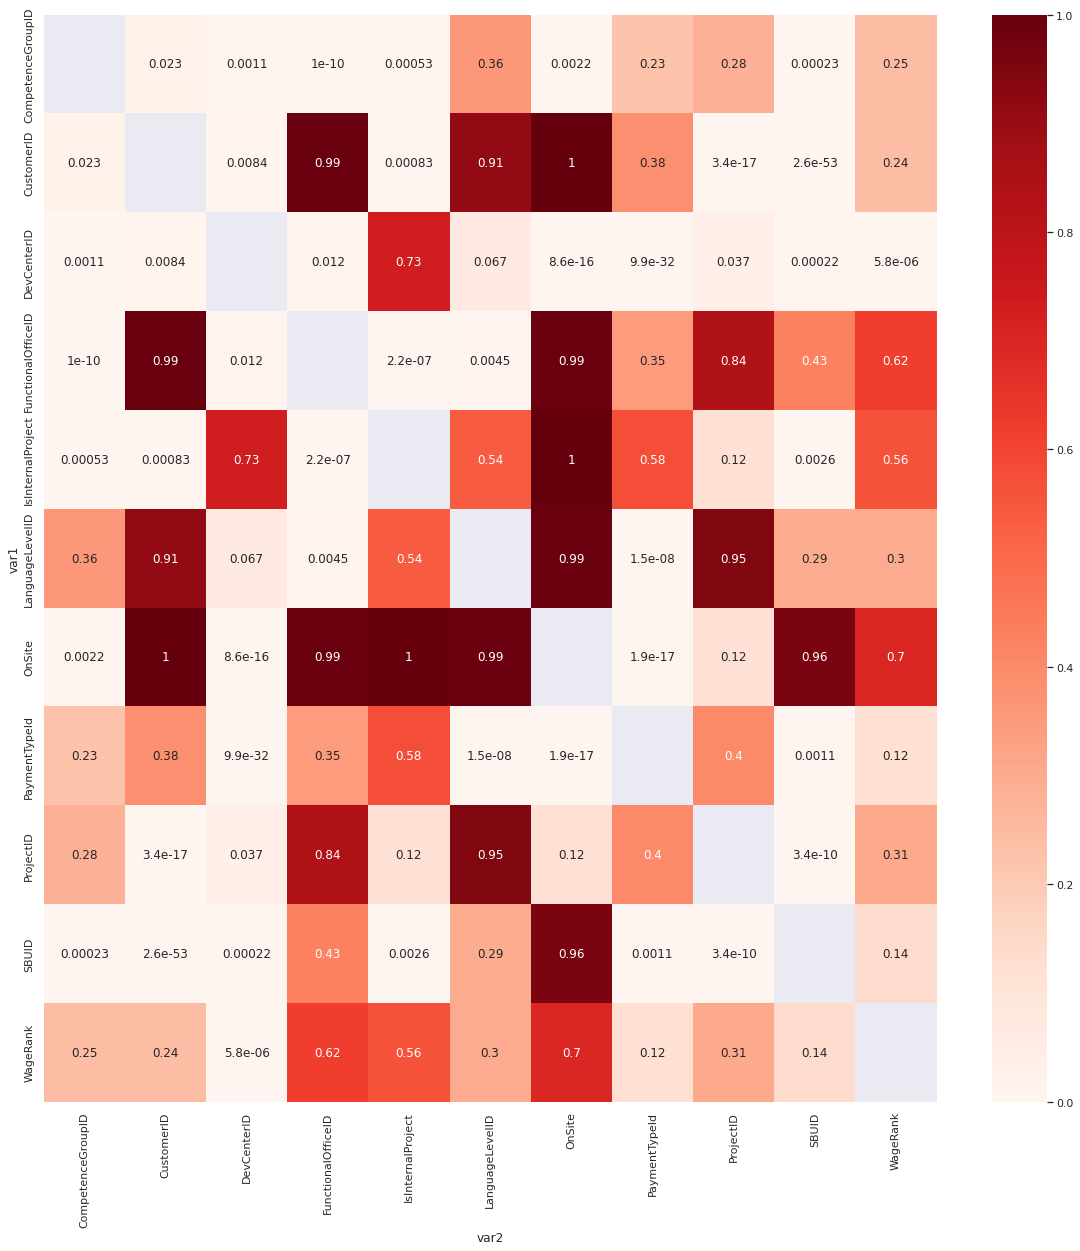

In [94]:
sns.set(rc = {'figure.figsize':(20, 20)})

def calc_cramer_pval(df, cat_cols, target_col):
    '''
    Calculate Cramer's V and p-values for corresponding association values.
    '''
    cat_prod = list(product(cat_cols + [target_col], cat_cols + [target_col], repeat=1))

    pval_res = []
    cram_res = []
    for i in cat_prod:
        if i[0] != i[1]:
            pval_res.append((i[0], i[1],
                          list(ss.chi2_contingency(pd.crosstab(df[i[0]], df[i[1]])))[1]))
            cram_res.append((i[0], i[1],
                            ss.contingency.association(pd.crosstab(df[i[0]], df[i[1]]))))

    pval_df = pd.DataFrame(pval_res, columns = ["var1", "var2", "coeff"])
    cram_df = pd.DataFrame(cram_res, columns = ["var1", "var2", "coeff"])
    pval_df = pval_df.pivot(index = "var1", columns = "var2", values = "coeff")
    cram_df = cram_df.pivot(index = "var1", columns = "var2", values = "coeff")
    
    return cram_df, pval_df

def plot_cramer_pval(cram_df, chi_df):
    sns.heatmap(cram_df, annot = True, cmap = 'Reds')
    plt.show()
    sns.heatmap(chi_df, annot = True, cmap = 'Reds')
    plt.show()


    
# remove: only 1 value for cat col
cram_df, pval_df = calc_cramer_pval(last_wage_df, [i for i in cat_cols if i not in ['IsTrainee', 'PositionID', 'PositionLevel']],
                                    'WageRank')
plot_cramer_pval(cram_df, pval_df)

In [105]:
# pos_lev_df = df[(df['PositionID'] == 5) & (df['PositionLevel'] == 4)].copy()
# pos_lev_df['CustomerID'].unique()

# don't give good representation
plt.figure(figsize=(5, 5))
# last_wage_df['WageGross'].hist(by=last_wage_df['CustomerID'])
# plt.show()

last_wage_df.groupby('ProjectID').mean()['WageGross']

last_wage_df.groupby('DevCenterID').mean()['WageGross']

DevCenterID
1     1.789036
2     1.655468
3     1.604846
4     1.593556
5     1.606446
8     2.070684
9     2.242712
13    2.078725
16    1.674671
18    2.129821
36    1.623048
Name: WageGross, dtype: float64

<Figure size 360x360 with 0 Axes>

In [212]:
# get last observes
last_df = df.groupby('EmployeeID').tail(1)
# for last observation
twage_growth = list()
for _, obs in last_df.iterrows():
    # filter by position (id, level)
    pos_df = df[(df['PositionID'] == obs['PositionID']) & (df['PositionLevel'] == obs['PositionLevel'])]
    # group by employee and find growth rates
    cur_rates = pos_df.groupby('EmployeeID').apply(lambda x: (max(x['WageGross']) 
                                                        - min(x['WageGross'])) / x.shape[0])
    cur_rate = cur_rates[obs['EmployeeID']]
    # find quantile
    cur_quant = get_quantile(cur_rate, cur_rates)
    twage_growth.append((obs['EmployeeID'], cur_quant))

# in quantiles
twage_growth = pd.DataFrame(twage_growth, columns=['EmployeeID', 'TimeWageRate'])
twage_growth = twage_growth.set_index('EmployeeID')
twage_growth = twage_growth.sort_index()

print(twage_growth.head())

print(f'Length: {twage_growth.shape[0]}\n')

                                      TimeWageRate
EmployeeID                                        
00116D71-E87D-4B64-A566-1F29B2A798A8             3
001502BB-B61A-404D-8A99-CC5DE5A4F985             2
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A             4
0034ECA4-0562-4AC7-A826-4AE81C64D69F             4
00384806-F711-41BA-A924-8F27E996F891             2
Length: 5373



In [213]:
# depends not only on level, but also on: project, utilization etc.

# df = hist

# def calc_lwage_growth(x):
#     if max(x['WageGross']) - min(x['WageGross']) > 0:
#         try:
#             return ((max(x['WageGross']) - min(x['WageGross'])) / 
#                     (max(x['PositionLevel']) - min(x['PositionLevel'])))
#         except:
#             # don't print whole dfs in loop :)
#             # print(x)
#             return 1
#     else:
#         return 0

# # get last observes
# last_df = df.groupby('EmployeeID').tail(1)
# # for last observation
# lwage_growth = list()
# for _, obs in last_df.iterrows():
#     # filter by position
#     pos_df = df[df['PositionID'] == obs['PositionID']]
#     # group by employee and find growth rates
#     cur_rates = pos_df.groupby('EmployeeID').apply(calc_lwage_growth)
#     cur_rate = cur_rates[obs['EmployeeID']]
#     # find quantile
#     cur_quant = get_quantile(cur_rate, cur_rates)
#     lwage_growth.append((obs['EmployeeID'], cur_quant))

# lwage_growth = pd.DataFrame(wage_growth, columns=['EmployeeID', 'LevelWageGrowth'])

# print(lwage_growth.head())

# print(f'Length: {lwage_growth.shape[0]}\n'
#       f'Duplicates: {sum(lwage_growth.EmployeeID.duplicated())}')

In [214]:
last_level_period = hist.groupby('EmployeeID').apply(lambda x: list(x['PositionLevel'] == x['PositionLevel'].iloc[-1]).count(True))
last_level_period.sort_index()
last_level_period = last_level_period.rename('LastLevelPeriod')

last_level_period.head()

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8     1
001502BB-B61A-404D-8A99-CC5DE5A4F985    10
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    20
0034ECA4-0562-4AC7-A826-4AE81C64D69F     1
00384806-F711-41BA-A924-8F27E996F891    20
Name: LastLevelPeriod, dtype: int64

In [215]:
print(hist[hist['EmployeeID'] == last_level_period.index[0]]['PositionLevel'])

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    3
Name: PositionLevel, dtype: int64


In [216]:
last_df = df.groupby('EmployeeID').tail(1)
rest_level = last_df.groupby('PositionID').apply(lambda x: pd.DataFrame({'EmployeeID': x['EmployeeID'], 
                                                                         'RestLevel': max(x['PositionLevel']) - x['PositionLevel']}))
rest_level.reset_index(drop=True, inplace=True)
rest_level = rest_level.set_index('EmployeeID')
rest_level = rest_level.sort_index()

rest_level.head()

,RestLevel
EmployeeID,
00116D71-E87D-4B64-A566-1F29B2A798A8,0
001502BB-B61A-404D-8A99-CC5DE5A4F985,0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A,0
0034ECA4-0562-4AC7-A826-4AE81C64D69F,0
00384806-F711-41BA-A924-8F27E996F891,0


In [217]:
# print(hist[hist['EmployeeID'] == rest_level.EmployeeID[0]])
print(set(hist[hist['PositionID'] == 71]['PositionLevel']))

{3}


In [218]:
def get_bonus_quants(x):
    mean_bonuses = x.groupby('EmployeeID').mean()['BonusOneTime']
    quants = mean_bonuses.quantile([0.25, 0.5, 0.75])
    return quants

# group by Position and calculate quants
bonus_quants = df.groupby(['PositionID', 'PositionLevel']).apply(get_bonus_quants)

# print(bonus_quants.head())

def get_emp_quants(x):
    # group by PositionID + PositionLevel with sort=False and mean()
    mean_bonuses = x.groupby(['PositionID', 'PositionLevel'], sort=False).mean('BonusOneTime')
    # calculate quant of mean bonus
    quants = list()
    for index, obs in mean_bonuses.iterrows():
        quant = get_quants_quant(obs['BonusOneTime'], bonus_quants.loc[index])
        quants.append(quant)
    quants.reverse()
    return tuple([x.name] + quants[:min(3, len(quants))] + [0]*(3 - len(quants)))

# group by employee
mean_bonus = df.groupby('EmployeeID').apply(get_emp_quants)
mean_bonus = pd.DataFrame(mean_bonus.tolist(), columns=['EmployeeID', 'MeanBonus1', 'MeanBonus2', 'MeanBonus3'])
mean_bonus = mean_bonus.set_index('EmployeeID')
mean_bonus = mean_bonus.sort_index()

print(mean_bonus.head())

                                      MeanBonus1  MeanBonus2  MeanBonus3
EmployeeID                                                              
00116D71-E87D-4B64-A566-1F29B2A798A8           0           0           0
001502BB-B61A-404D-8A99-CC5DE5A4F985           3           0           0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A           3           0           0
0034ECA4-0562-4AC7-A826-4AE81C64D69F           4           4           3
00384806-F711-41BA-A924-8F27E996F891           3           0           0


In [219]:
hist[hist['EmployeeID'] == '00116D71-E87D-4B64-A566-1F29B2A798A8']

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
0,00116D71-E87D-4B64-A566-1F29B2A798A8,7/1/17,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.7619,40,0,0,0,15,1,9,0,39,0.887446,1,1
1,00116D71-E87D-4B64-A566-1F29B2A798A8,8/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,200,28,0.887446,2,2
2,00116D71-E87D-4B64-A566-1F29B2A798A8,9/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.5000,72,0,0,0,15,1,9,0,43,0.887446,3,3
3,00116D71-E87D-4B64-A566-1F29B2A798A8,10/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8636,16,0,0,0,15,1,9,0,49,0.887446,4,4
4,00116D71-E87D-4B64-A566-1F29B2A798A8,11/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8000,8,0,0,0,15,1,9,0,43,0.887446,5,5
5,00116D71-E87D-4B64-A566-1F29B2A798A8,12/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.9545,0,0,0,0,15,1,9,0,45,0.887446,6,6
6,00116D71-E87D-4B64-A566-1F29B2A798A8,1/1/18,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,200,46,0.887446,7,7
7,00116D71-E87D-4B64-A566-1F29B2A798A8,2/1/18,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.9000,16,0,0,0,15,1,9,0,47,0.887446,8,8
8,00116D71-E87D-4B64-A566-1F29B2A798A8,3/1/18,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,0,48,0.887446,9,9
9,00116D71-E87D-4B64-A566-1F29B2A798A8,4/1/18,3,284,70,2,0,11,888A91D6-1F35-4337-ADCD-E4D7F0399DF1,4AAF7425-575B-46CB-A42D-F43A53187D32,0,0.5714,8,0,0,0,15,1,9,0,19,0.887446,10,10


In [220]:
proj_period = df.groupby('EmployeeID').apply(lambda x: (x['ProjectID'] == x['ProjectID'].iloc[-1]).sum())
proj_period = proj_period.sort_index()
proj_period = proj_period.rename('MonthsOnProject')

proj_period.head()

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    8
001502BB-B61A-404D-8A99-CC5DE5A4F985    0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    1
0034ECA4-0562-4AC7-A826-4AE81C64D69F    4
00384806-F711-41BA-A924-8F27E996F891    0
Name: MonthsOnProject, dtype: int64

In [221]:
hist[hist['EmployeeID'] == '001502BB-B61A-404D-8A99-CC5DE5A4F985']

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
20,001502BB-B61A-404D-8A99-CC5DE5A4F985,7/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,1,1
21,001502BB-B61A-404D-8A99-CC5DE5A4F985,8/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,2,2
22,001502BB-B61A-404D-8A99-CC5DE5A4F985,9/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,3,3
23,001502BB-B61A-404D-8A99-CC5DE5A4F985,10/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,4,4
24,001502BB-B61A-404D-8A99-CC5DE5A4F985,11/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,5,5
25,001502BB-B61A-404D-8A99-CC5DE5A4F985,12/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,6,6
26,001502BB-B61A-404D-8A99-CC5DE5A4F985,1/1/18,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,7,7
27,001502BB-B61A-404D-8A99-CC5DE5A4F985,2/1/18,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,8,8
28,001502BB-B61A-404D-8A99-CC5DE5A4F985,3/1/18,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,9,9
29,001502BB-B61A-404D-8A99-CC5DE5A4F985,4/1/18,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,10,10


In [224]:
def get_former_pos_months(x):
    search_threshold = 3
    bore_threshold = 6
    positions = x['PositionID'].unique()
    if positions.size < 2:
        return 0
    former_pos_months = (x['PositionID'] == positions[-2]).sum()
    if former_pos_months < bore_threshold:
        return 0
    cur_pos_months = (x['PositionID'] == positions[-1]).sum()
    if cur_pos_months > search_threshold:
        return 0
    return former_pos_months

form_months = df.groupby('EmployeeID').apply(get_former_pos_months)
form_months = form_months.sort_index()
form_months = form_months.rename('FormerPosMonths')

form_months.head()

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    0
001502BB-B61A-404D-8A99-CC5DE5A4F985    0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    0
0034ECA4-0562-4AC7-A826-4AE81C64D69F    0
00384806-F711-41BA-A924-8F27E996F891    0
Name: FormerPosMonths, dtype: int64

In [225]:
mean_vacation = df.groupby('EmployeeID')['HourVacation'].mean()
mean_vacation = mean_vacation.sort_index()
mean_vacation = mean_vacation.rename('MeanHourVacation')

mean_vacation.head()

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    17.176471
001502BB-B61A-404D-8A99-CC5DE5A4F985     0.000000
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    17.882353
0034ECA4-0562-4AC7-A826-4AE81C64D69F    13.647059
00384806-F711-41BA-A924-8F27E996F891     0.000000
Name: MeanHourVacation, dtype: float64

In [226]:
pos_lang_modes = df.groupby(['PositionID', 'PositionLevel']).aggregate(pd.Series.mode)['LanguageLevelID']
pos_lang_modes = pos_lang_modes.apply(lambda x: x if isinstance(x, np.int64) else np.mean(x))

# print(pos_lang_modes.head())

def get_shift_lang(x):
    max_levels = 3
    pos_last = x.groupby(['PositionID', 'PositionLevel'], sort=False).tail(1)
    levels = list()
    for _, obs in pos_last.iterrows():
        mode = pos_lang_modes.loc[(obs['PositionID'], obs['PositionLevel'])]
        cur_level = obs['LanguageLevelID'] - mode
        levels.append(cur_level)
    levels.reverse()
    return [x.name] + levels[:min(3, len(levels))] + (max_levels - len(levels)) * [100]

shift_lang = df.groupby('EmployeeID').apply(get_shift_lang)
shift_lang = pd.DataFrame(shift_lang.to_list(), columns=['EmployeeID', 'PosLangLevel1', 'PosLangLevel2', 'PosLangLevel3'])
shift_lang = shift_lang.set_index('EmployeeID')
shift_lang = shift_lang.sort_index()

shift_lang.head()

,PosLangLevel1,PosLangLevel2,PosLangLevel3
EmployeeID,,,
00116D71-E87D-4B64-A566-1F29B2A798A8,0.0,100.0,100.0
001502BB-B61A-404D-8A99-CC5DE5A4F985,9.0,100.0,100.0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A,0.0,100.0,100.0
0034ECA4-0562-4AC7-A826-4AE81C64D69F,0.0,8.0,0.0
00384806-F711-41BA-A924-8F27E996F891,7.0,100.0,100.0


In [227]:
# TODO: fix NaN
pos_proj = df.groupby(['ProjectID', 'PositionID']) # , dropna=False

def get_last_dates(x):
    dates = x.groupby('EmployeeID').tail(1)[['EmployeeID', 'Date']]
    return dates

emp_dates = pos_proj.apply(get_last_dates)

def get_date_count(x):
    cur_dates = emp_dates.loc[x.name]
    emp_counts = list()
    for idx, obs in cur_dates.iterrows():
        cur_count = (x['Date'] == obs['Date']).sum()
        emp_counts.append((obs['EmployeeID'], obs['Date'], cur_count))
    return pd.DataFrame(emp_counts, columns=['EmployeeID', 'Date', 'ProjPosCount'])

date_count = pos_proj.apply(get_date_count)
date_count = date_count.reset_index(drop=True)
date_count = date_count.sort_values(['EmployeeID', 'Date'])

def get_emp_counts(x):
    max_counts = 3
    counts = list(x['ProjPosCount'].iloc[::-1])
    return [x.name] + counts[:min(3, len(counts))] + [0] * (max_counts - len(counts))

emp_counts = date_count.groupby('EmployeeID').apply(get_emp_counts)
emp_counts = pd.DataFrame(emp_counts.to_list(), columns=['EmployeeID', 'ProjPosCount1', 'ProjPosCount2', 'ProjPosCount3'])
proj_pos_count = emp_counts.set_index('EmployeeID')
proj_pos_count = proj_pos_count.sort_index()

proj_pos_count.head()

,ProjPosCount1,ProjPosCount2,ProjPosCount3
EmployeeID,,,
00116D71-E87D-4B64-A566-1F29B2A798A8,2,1,0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A,1,1,0
0034ECA4-0562-4AC7-A826-4AE81C64D69F,2,2,3
003D7C3B-AEDE-4780-A7D8-17ACD32DABCC,4,3,1
0040B626-4578-4C4B-B3CB-42270CEAFF6C,1,16,0


In [228]:
# proj_pos_count[proj_pos_count['ProjPosCount1'] >= 2]
hist[hist['EmployeeID'] == '001502BB-B61A-404D-8A99-CC5DE5A4F985']

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
20,001502BB-B61A-404D-8A99-CC5DE5A4F985,7/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,1,1
21,001502BB-B61A-404D-8A99-CC5DE5A4F985,8/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,2,2
22,001502BB-B61A-404D-8A99-CC5DE5A4F985,9/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,3,3
23,001502BB-B61A-404D-8A99-CC5DE5A4F985,10/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,4,4
24,001502BB-B61A-404D-8A99-CC5DE5A4F985,11/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,5,5
25,001502BB-B61A-404D-8A99-CC5DE5A4F985,12/1/17,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,6,6
26,001502BB-B61A-404D-8A99-CC5DE5A4F985,1/1/18,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,7,7
27,001502BB-B61A-404D-8A99-CC5DE5A4F985,2/1/18,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,8,8
28,001502BB-B61A-404D-8A99-CC5DE5A4F985,3/1/18,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,9,9
29,001502BB-B61A-404D-8A99-CC5DE5A4F985,4/1/18,1,55,203,2,0,20,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,NaN,1,0.0,0,0,0,0,23,0,1,0,0,0.673111,10,10


In [ ]:
# bonus
# TODO: fix bonuses in half, year;
half_num_bonus = df.groupby('EmployeeID').apply(lambda x: (x.tail(6)['BonusOneTime'] != 0).sum())
year_num_bonus = df.groupby('EmployeeID').apply(lambda x: (x.tail(12)['BonusOneTime'] != 0).sum()
                                                  if x.shape[0] >= 12 else None)
freq_bonus = df.groupby('EmployeeID').apply(lambda x: (x['BonusOneTime'] != 0).sum() / x.shape[0])
time_prev_bonus = df.groupby('EmployeeID').apply(lambda x: (x.shape[0] - (np.where(x['BonusOneTime'] != 0)[0][-1] + 1)) if (x['BonusOneTime'] != 0).sum() > 0 else None)

In [93]:
df['MeanPositionBonus'] = df.groupby(['PositionID', 'PositionLevel'])['BonusOneTime'].transform(lambda x: x[x!=0].mean())
df['BonusBiggerMean'] = np.where(df['BonusOneTime'] > df['MeanPositionBonus'], 1, 0)
prev_bonus_bigger_mean = df.groupby('EmployeeID').apply(lambda x: x[x['BonusOneTime'] > 0].iloc[-1]['BonusBiggerMean']
                                                  if x[x['BonusOneTime'] > 0].shape[0] > 0 else None)
# prev_bonus_bigger_mean.head()

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    0.0
001502BB-B61A-404D-8A99-CC5DE5A4F985    NaN
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    1.0
0034ECA4-0562-4AC7-A826-4AE81C64D69F    0.0
00384806-F711-41BA-A924-8F27E996F891    NaN
dtype: float64

In [97]:
# df[df['EmployeeID'] == '00116D71-E87D-4B64-A566-1F29B2A798A8']

In [98]:
df['BonusDifference'] = np.where(df['BonusOneTime'] > 0, df['BonusOneTime'] - df['MeanPositionBonus'], None)
bonus_diff = df.groupby('EmployeeID').apply(lambda x: x[x['BonusOneTime'] > 0].iloc[-1]['BonusDifference']
                                                  if x[x['BonusOneTime'] > 0].shape[0] > 0 else None)

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8   -167.796610
001502BB-B61A-404D-8A99-CC5DE5A4F985           NaN
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    241.666667
0034ECA4-0562-4AC7-A826-4AE81C64D69F   -174.431507
00384806-F711-41BA-A924-8F27E996F891           NaN
dtype: float64

In [125]:
def get_pos_bonus_quant(x):
    cur_bonus = x['BonusOneTime']
    cur_quant = get_quants_quant(cur_bonus, x[['BonusQ1', 'BonusQ2', 'BonusQ3']])
    return cur_quant

df['BonusQ1'] = df.groupby(['PositionID', 'PositionLevel'])['BonusOneTime'].transform(lambda x: x[x!=0].quantile(0.2))
df['BonusQ2'] = df.groupby(['PositionID', 'PositionLevel'])['BonusOneTime'].transform(lambda x: x[x!=0].quantile(0.5))
df['BonusQ3'] = df.groupby(['PositionID', 'PositionLevel'])['BonusOneTime'].transform(lambda x: x[x!=0].quantile(0.8))
df['PosBonusQuant'] = df.apply(get_pos_bonus_quant, axis=1)

pos_bonus_quant = df.groupby('EmployeeID').apply(lambda x: x[x['BonusOneTime'] > 0].iloc[-1]['PosBonusQuant']
                                                  if x[x['BonusOneTime'] > 0].shape[0] > 0 else None)

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    2.0
001502BB-B61A-404D-8A99-CC5DE5A4F985    NaN
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    4.0
0034ECA4-0562-4AC7-A826-4AE81C64D69F    2.0
00384806-F711-41BA-A924-8F27E996F891    NaN
dtype: float64

In [130]:
half_bonus_comparison = half_num_bonus / freq_bonus

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8     6.333333
001502BB-B61A-404D-8A99-CC5DE5A4F985          NaN
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    19.000000
0034ECA4-0562-4AC7-A826-4AE81C64D69F     6.333333
00384806-F711-41BA-A924-8F27E996F891          NaN
dtype: float64

In [153]:
# wage
def get_half_wage_rate(x, period):
    last_wage = x.iloc[-1]['WageGross']
    earlier_month = min(period, x.shape[0])
    prev_wage = x.iloc[-earlier_month]['WageGross']
    rate = (last_wage - prev_wage) / earlier_month
    return rate

# too big percent
# tt = df.groupby('EmployeeID').apply(lambda x: x.shape[0] < 13)
# print(f'pct of < 12: {tt.sum() / tt.shape[0]}')
half_wage_rate = df.groupby('EmployeeID').apply(get_half_wage_rate, (6))
year_wage_rate = df.groupby('EmployeeID').apply(get_half_wage_rate, (12))
wage_rate = df.groupby('EmployeeID').apply(lambda x: (x.iloc[-1]['WageGross'] - x.iloc[0]['WageGross']) / x.shape[0])

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    0.005321
001502BB-B61A-404D-8A99-CC5DE5A4F985    0.000000
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    0.004709
0034ECA4-0562-4AC7-A826-4AE81C64D69F    0.022216
00384806-F711-41BA-A924-8F27E996F891    0.000718
dtype: float64

In [159]:
df['PosGeoWageMean'] = df.groupby(['PositionID', 'PositionLevel', 'DevCenterID'])['WageGross'].transform('mean')
df['WageBiggerPGMean'] = np.where(df['WageGross'] > df['PosGeoWageMean'], 1, 0)
wage_bigger_pg_mean = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['WageBiggerPGMean'])
wage_bigger_pg_mean.head()

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    1
001502BB-B61A-404D-8A99-CC5DE5A4F985    0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    1
0034ECA4-0562-4AC7-A826-4AE81C64D69F    1
00384806-F711-41BA-A924-8F27E996F891    0
dtype: int64

In [161]:
df['PosDepWageMean'] = df.groupby(['PositionID', 'PositionLevel', 'SBUID'])['WageGross'].transform('mean')
df['WageBiggerPSMean'] = np.where(df['WageGross'] > df['PosStrWageMean'], 1, 0)
wage_bigger_ps_mean = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['WageBiggerPSMean'])
wage_bigger_ps_mean.head()

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,MeanPositionBonus,BonusBiggerMean,BonusDifference,BonusQ1,BonusQ2,BonusQ3,PosBonusQuant,PosGeoWageMean,WageBiggerPGMean,PosStrWageMean,WageBiggerPSMean
0,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-07-01,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.7619,40,0,0,0,15,1,9,0,39,0.887446,1,1,267.79661,0,None,92.6,135.0,226.6,1,0.801575,1,1.205910,0
1,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-08-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,200,28,0.887446,2,2,267.79661,0,-67.79661,92.6,135.0,226.6,3,0.801575,1,0.730325,1
2,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-09-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.5000,72,0,0,0,15,1,9,0,43,0.887446,3,3,267.79661,0,None,92.6,135.0,226.6,1,0.801575,1,0.730325,1
3,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-10-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8636,16,0,0,0,15,1,9,0,49,0.887446,4,4,267.79661,0,None,92.6,135.0,226.6,1,0.801575,1,0.730325,1
4,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-11-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8000,8,0,0,0,15,1,9,0,43,0.887446,5,5,267.79661,0,None,92.6,135.0,226.6,1,0.801575,1,0.730325,1


In [164]:
wage_pg_diff = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['WageGross'] - x.iloc[-1]['PosGeoWageMean'])
wage_ps_diff = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['WageGross'] - x.iloc[-1]['PosStrWageMean'])

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    0.000000
001502BB-B61A-404D-8A99-CC5DE5A4F985   -0.232313
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    0.055792
0034ECA4-0562-4AC7-A826-4AE81C64D69F    0.164448
00384806-F711-41BA-A924-8F27E996F891   -0.018589
dtype: float64

In [165]:
def get_pos_wage_quant(x):
    cur_wage = x['WageGross']
    cur_quant = get_quants_quant(cur_wage, x[['PosWageQ1', 'PosWageQ2', 'PosWageQ3']])
    return cur_quant

df['PosWageQ1'] = df.groupby(['PositionID', 'PositionLevel'])['WageGross'].transform(lambda x: x[x!=0].quantile(0.2))
df['PosWageQ2'] = df.groupby(['PositionID', 'PositionLevel'])['WageGross'].transform(lambda x: x[x!=0].quantile(0.5))
df['PosWageQ3'] = df.groupby(['PositionID', 'PositionLevel'])['WageGross'].transform(lambda x: x[x!=0].quantile(0.8))
df['PosWageQuant'] = df.apply(get_pos_wage_quant, axis=1)

pos_wage_quant = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['PosWageQuant'])

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    3
001502BB-B61A-404D-8A99-CC5DE5A4F985    1
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    4
0034ECA4-0562-4AC7-A826-4AE81C64D69F    3
00384806-F711-41BA-A924-8F27E996F891    2
dtype: int64

In [167]:
def get_pos_lang_wage_quant(x):
    cur_wage = x['WageGross']
    cur_quant = get_quants_quant(cur_wage, x[['PosLangWageQ1', 'PosLangWageQ2', 'PosLangWageQ3']])
    return cur_quant

df['PosLangWageQ1'] = df.groupby(['PositionID', 'PositionLevel', 'LanguageLevelID'])['WageGross'].transform(lambda x: x[x!=0].quantile(0.2))
df['PosLangWageQ2'] = df.groupby(['PositionID', 'PositionLevel', 'LanguageLevelID'])['WageGross'].transform(lambda x: x[x!=0].quantile(0.5))
df['PosLangWageQ3'] = df.groupby(['PositionID', 'PositionLevel', 'LanguageLevelID'])['WageGross'].transform(lambda x: x[x!=0].quantile(0.8))
df['PosLangWageQuant'] = df.apply(get_pos_lang_wage_quant, axis=1)

pos_lang_wage_quant = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['PosLangWageQuant'])
pos_lang_wage_quant.head()

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    4
001502BB-B61A-404D-8A99-CC5DE5A4F985    1
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    4
0034ECA4-0562-4AC7-A826-4AE81C64D69F    3
00384806-F711-41BA-A924-8F27E996F891    2
dtype: int64

In [169]:
half_wage_comparison = half_wage_rate / wage_rate

In [181]:
# language level
df['PosLangMode'] = df.groupby(['PositionID', 'PositionLevel'])['LanguageLevelID'].transform(lambda x: x.mode().mean())
df['LangBiggerPosMode'] = np.where(df['LanguageLevelID'] > df['PosLangMode'], 1, 0)

pos_lang_big_mode = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['LangBiggerPosMode'])

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    0
001502BB-B61A-404D-8A99-CC5DE5A4F985    1
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    0
0034ECA4-0562-4AC7-A826-4AE81C64D69F    0
00384806-F711-41BA-A924-8F27E996F891    1
dtype: int64

In [191]:
def get_num_feat_rate(x, feat, period):
    last_val = x.iloc[-1][feat]
    earlier_month = min(period, x.shape[0])
    prev_val = x.iloc[-earlier_month][feat]
    rate = (last_val - prev_val) / earlier_month
    return rate

half_lang_rate = df.groupby('EmployeeID').apply(get_num_feat_rate, feat='LanguageLevelID', period=6)
year_lang_rate = df.groupby('EmployeeID').apply(get_num_feat_rate, feat='LanguageLevelID', period=12)
lang_rate = df.groupby('EmployeeID').apply(lambda x: (x.iloc[-1]['LanguageLevelID'] - x.iloc[0]['LanguageLevelID']) / x.shape[0])
pos_lang_comparison = half_lang_rate / lang_rate

In [192]:
df['PosProjLangMode'] = df.groupby(['PositionID', 'PositionLevel', 'ProjectID'])['LanguageLevelID'].transform(lambda x: x.mode().mean())
df['LangBiggerPPMode'] = np.where(df['LanguageLevelID'] > df['PosProjLangMode'], 1, 0)

pp_lang_big_mode = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['LangBiggerPPMode'])

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    0
001502BB-B61A-404D-8A99-CC5DE5A4F985    0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    0
0034ECA4-0562-4AC7-A826-4AE81C64D69F    0
00384806-F711-41BA-A924-8F27E996F891    0
dtype: int64

In [200]:
# fPositionID
df['PosPeriodMean'] = df.groupby('EmployeeID')['PositionID'].transform(lambda x: x.shape[0] / x.nunique())
mean_pos_period = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['PosPeriodMean'])
# equality because people who doesn't switch position are stable
df['PosBiggerMean'] = np.where(df['MonthOnPosition'] >= df['PosPeriodMean'], 1, 0)
pos_big_mean = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['PosBiggerMean'])

In [22]:
top_5_pos = df.groupby('EmployeeID').tail(1).groupby('PositionID')['EmployeeID'].count().sort_values(ascending=False).index.values[0:5]
emp_top_pos = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['PositionID'] in top_5_pos)
emp_top_pos = emp_top_pos.astype(np.int64)

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    0
001502BB-B61A-404D-8A99-CC5DE5A4F985    1
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    0
0034ECA4-0562-4AC7-A826-4AE81C64D69F    0
00384806-F711-41BA-A924-8F27E996F891    0
dtype: int64

In [31]:
df['PosGeoNum'] = df.groupby(['Date', 'PositionID', 'DevCenterID'])['EmployeeID'].transform(lambda x: x.nunique())
pos_geo_num = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['PosGeoNum'])
df['PosStrNum'] = df.groupby(['Date', 'PositionID', 'SBUID'])['EmployeeID'].transform(lambda x: x.nunique())
pos_str_num = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['PosStrNum'])

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8      2
001502BB-B61A-404D-8A99-CC5DE5A4F985    112
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A      1
0034ECA4-0562-4AC7-A826-4AE81C64D69F      7
00384806-F711-41BA-A924-8F27E996F891     91
dtype: int64

In [30]:
df['PosLevelGeoNum'] = df.groupby(['Date', 'PositionID', 'PositionLevel', 'DevCenterID'])['EmployeeID'].transform(lambda x: x.nunique())
pos_level_geo_num = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['PosLevelGeoNum'])

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8      2
001502BB-B61A-404D-8A99-CC5DE5A4F985    112
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A      1
0034ECA4-0562-4AC7-A826-4AE81C64D69F      7
00384806-F711-41BA-A924-8F27E996F891     91
dtype: int64

In [24]:
def get_cat_feat_rate(x, feat, period):
    earlier_month = min(period, x.shape[0])
    num_changes = x.iloc[-earlier_month:][feat].nunique()
    rate = num_changes / earlier_month
    return rate

half_pos_changes = df.groupby('EmployeeID').apply(get_cat_feat_rate, feat='PositionID', period=6)
year_pos_changes = df.groupby('EmployeeID').apply(get_cat_feat_rate, feat='PositionID', period=12)
all_pos_changes = df.groupby('EmployeeID').apply(lambda x: x['PositionID'].nunique() / x.shape[0])
pos_changes_comparison = half_pos_changes / all_pos_changes

In [19]:
# doesn't have a matter because constantly = 1
# df['PosLevelMean'] = df.groupby('PositionID')['PositionLevel'].transform(lambda x: x.nunique())
# df['PosLevBiggerMean'] = np.where(df['PositionLevel'] >= df['PosLevelMean'], 1, 0)
# pos_lev_big_mean = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['PosLevBiggerMean'])

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,EmpOnProj,PosLevelMean,PosLevBiggerMean


In [23]:
# tt = df.groupby('PositionID')['PositionLevel'].apply(lambda x: x.nunique())
# (tt != 1).sum()

0

In [50]:
# position level
# all_lev_growth = df.groupby(['EmployeeID', 'PositionID']).apply(lambda x: (x.iloc[-1]['PositionLevel'] - x.iloc[0]['PositionLevel']) / x.shape[0])#.groupby('EmployeeID').mean()
# all_lev_growth#[all_lev_growth > 0]

# nobody improves his position
# all_lev_growth = df.groupby(['EmployeeID', 'PositionID']).apply(lambda x: x['PositionLevel'].nunique() > 1)#.groupby('EmployeeID').mean()
# all_lev_growth.sum()#[all_lev_growth > 0]

0

In [58]:
# trainee
was_trainee = df.groupby('EmployeeID').apply(lambda x: 1 in x['IsTrainee'].values)

5373

In [67]:
# customer
df['CustTimeMean'] = df.groupby('CustomerID')['EmployeeID'].transform(lambda x: x.shape[0] / x.nunique())
cust_time_mean = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['CustTimeMean'])
df['CustTime'] = df.groupby('CustomerID')['EmployeeID'].transform(lambda x: np.arange(1, x.size + 1))
df['CustTimeBiggerMean'] = np.where(df['CustTime'] > df['CustTimeMean'], 1, 0)
cust_time_big_mean = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['CustTimeBiggerMean'])

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    1
001502BB-B61A-404D-8A99-CC5DE5A4F985    0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    1
0034ECA4-0562-4AC7-A826-4AE81C64D69F    1
00384806-F711-41BA-A924-8F27E996F891    1
003D7C3B-AEDE-4780-A7D8-17ACD32DABCC    1
0040B626-4578-4C4B-B3CB-42270CEAFF6C    1
005B5FD6-FD19-4924-98E4-4C06F7F6BF2C    1
0061CAE7-B123-46B0-9BF7-E1E94E9AD80B    1
006E332A-B32B-4858-BB97-9DBB659283F1    1
0074F2BF-ECEA-484A-9355-BE8EE3E8642F    1
00822DB1-D4CB-4B8F-AF02-1FA6B6A44528    1
0086EAF5-5A95-4E6B-B5EF-1B22CDF0538E    1
00885F06-FFEA-48F6-A338-3439FA676787    1
008CD18A-3AFA-446F-A95E-DDAA8E6E3C6F    1
009345FE-0A28-40FF-8E4F-968F2E7DCC8C    1
00965EE4-8EAD-40FB-81E0-DFAAF7BDA1CC    0
00A7B587-EFC6-4F19-9F9E-8E6EFB8872AC    0
00B70800-C2AC-4C2A-9203-22A0FA2B8502    1
00DBB0F8-26A9-4CC5-9C22-49FA570390CD    1
00DDA8FB-5640-4311-B84C-B81719C24483    1
00E30C7A-3400-4A74-B5A8-1532C766DB24    0
00ED0622-A212-45EA-B1BD-17F4602B7807    1
00EDA2E5-78A3-4FB4-9EED

In [14]:
emp['Dismissed'] = (~emp['DismissalDate'].isna()).astype('int64')
df = df.merge(emp[['EmployeeID', 'Dismissed']], on='EmployeeID')

In [20]:
df = df.rename(columns={'DismCust_y': 'DismCust'})

In [24]:
cust_dism_emp = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['CustomerID'] if x.iloc[-1]['Dismissed'] == 1 else None)
cust_dism_emp = cust_dism_emp.rename('CustomerID').reset_index()
cust_dism_emp = cust_dism_emp.groupby('CustomerID').count().rename(columns={'EmployeeID': 'DismCust'}).reset_index()
df = df.merge(cust_dism_emp, on='CustomerID', how='left')
all_cust_dism_emp = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['DismCust'])

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8      8.0
001502BB-B61A-404D-8A99-CC5DE5A4F985    376.0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    376.0
0034ECA4-0562-4AC7-A826-4AE81C64D69F     14.0
00384806-F711-41BA-A924-8F27E996F891    376.0
dtype: float64

In [25]:
df['CustNumProjs'] = df.groupby('CustomerID')['ProjectID'].transform(lambda x: x.nunique())
emp_cust_num_projs = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['CustNumProjs'])

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,Dismissed,DismCust,CustNumProjs
0,00116D71-E87D-4B64-A566-1F29B2A798A8,7/1/17,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.7619,40,0,0,0,15,1,9,0,39,0.887446,1,1,0,60.0,94
1,00116D71-E87D-4B64-A566-1F29B2A798A8,8/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,200,28,0.887446,2,2,0,60.0,94
2,00116D71-E87D-4B64-A566-1F29B2A798A8,9/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.5000,72,0,0,0,15,1,9,0,43,0.887446,3,3,0,60.0,94
3,00116D71-E87D-4B64-A566-1F29B2A798A8,10/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8636,16,0,0,0,15,1,9,0,49,0.887446,4,4,0,60.0,94
4,00116D71-E87D-4B64-A566-1F29B2A798A8,11/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8000,8,0,0,0,15,1,9,0,43,0.887446,5,5,0,60.0,94


In [29]:
df['CustNumEmps'] = df.groupby('CustomerID')['EmployeeID'].transform(lambda x: x.nunique())
cust_num_emps = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['CustNumEmps'])
df['CustDismRate'] = df['DismCust'] / df['CustNumEmps']
cust_dism_rate = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['CustDismRate'])

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,Dismissed,DismCust,CustNumProjs,CustNumEmps,CustDismRate
0,00116D71-E87D-4B64-A566-1F29B2A798A8,7/1/17,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.7619,40,0,0,0,15,1,9,0,39,0.887446,1,1,0,60.0,94,420,0.142857
1,00116D71-E87D-4B64-A566-1F29B2A798A8,8/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,200,28,0.887446,2,2,0,60.0,94,420,0.142857
2,00116D71-E87D-4B64-A566-1F29B2A798A8,9/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.5000,72,0,0,0,15,1,9,0,43,0.887446,3,3,0,60.0,94,420,0.142857
3,00116D71-E87D-4B64-A566-1F29B2A798A8,10/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8636,16,0,0,0,15,1,9,0,49,0.887446,4,4,0,60.0,94,420,0.142857
4,00116D71-E87D-4B64-A566-1F29B2A798A8,11/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8000,8,0,0,0,15,1,9,0,43,0.887446,5,5,0,60.0,94,420,0.142857


In [39]:
# project id
emp_proj_period_mean = df.groupby('EmployeeID')['ProjectID'].apply(lambda x: (~x.isna()).sum() / x.nunique() if x.nunique() > 0 else None).mean()
df['MonthOnProject'] = df.groupby(['EmployeeID', 'ProjectID'])['EmployeeID'].transform(lambda x: np.arange(1, x.size + 1))
proj_period_big_mean = df.groupby('EmployeeID').apply(lambda x: int(x.iloc[-1]['MonthOnProject'] > emp_proj_period_mean))

2438

In [12]:
df['EmpOnProj'] = df.groupby(['Date', 'ProjectID'])['EmployeeID'].transform('nunique')
num_emp_proj = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['EmpOnProj'])

In [41]:
half_proj_changes = df.groupby('EmployeeID').apply(get_cat_feat_rate, feat='ProjectID', period=6)
year_proj_changes = df.groupby('EmployeeID').apply(get_cat_feat_rate, feat='ProjectID', period=12)
all_proj_changes = df.groupby('EmployeeID').apply(lambda x: x['ProjectID'].nunique() / x.shape[0])
proj_changes_comparison = half_proj_changes / all_proj_changes

In [34]:
df['ProjPosWageDiff'] = df['WageGross'] - df.groupby(['ProjectID', 'PositionID', 'PositionLevel'])['WageGross'].transform('mean')
proj_pos_wage_diff = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['ProjPosWageDiff'])

In [39]:
# fUtilization
df['UtilizedBiggerMean'] = np.where(df['Utilization'] > df.groupby(['PositionID'])['Utilization'].transform('mean'), 1, 0)
util_big_mean = df.groupby('EmployeeID').apply(lambda x: 1 if (x.iloc[-3:]['UtilizedBiggerMean'] == 1).sum() == 3 else 0)

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    1
001502BB-B61A-404D-8A99-CC5DE5A4F985    0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    0
0034ECA4-0562-4AC7-A826-4AE81C64D69F    1
00384806-F711-41BA-A924-8F27E996F891    0
003D7C3B-AEDE-4780-A7D8-17ACD32DABCC    0
0040B626-4578-4C4B-B3CB-42270CEAFF6C    0
005B5FD6-FD19-4924-98E4-4C06F7F6BF2C    0
0061CAE7-B123-46B0-9BF7-E1E94E9AD80B    0
006E332A-B32B-4858-BB97-9DBB659283F1    1
0074F2BF-ECEA-484A-9355-BE8EE3E8642F    0
00822DB1-D4CB-4B8F-AF02-1FA6B6A44528    1
0086EAF5-5A95-4E6B-B5EF-1B22CDF0538E    1
00885F06-FFEA-48F6-A338-3439FA676787    1
008CD18A-3AFA-446F-A95E-DDAA8E6E3C6F    0
009345FE-0A28-40FF-8E4F-968F2E7DCC8C    0
00965EE4-8EAD-40FB-81E0-DFAAF7BDA1CC    1
00A7B587-EFC6-4F19-9F9E-8E6EFB8872AC    1
00B70800-C2AC-4C2A-9203-22A0FA2B8502    1
00DBB0F8-26A9-4CC5-9C22-49FA570390CD    1
00DDA8FB-5640-4311-B84C-B81719C24483    0
00E30C7A-3400-4A74-B5A8-1532C766DB24    0
00ED0622-A212-45EA-B1BD-17F4602B7807    0
00EDA2E5-78A3-4FB4-9EED

In [49]:
half_util_mean = df.groupby('EmployeeID').apply(lambda x: x.iloc[-min(6, x.shape[0]):]['Utilization'].mean())
year_util_mean = df.groupby('EmployeeID').apply(lambda x: x.iloc[-min(12, x.shape[0]):]['Utilization'].mean())
all_util_mean = df.groupby('EmployeeID').apply(lambda x: x['Utilization'].mean())
util_mean_comparison = half_util_changes / all_util_changes

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    0.913232
001502BB-B61A-404D-8A99-CC5DE5A4F985    0.000000
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    0.000000
0034ECA4-0562-4AC7-A826-4AE81C64D69F    0.955874
00384806-F711-41BA-A924-8F27E996F891    0.000000
003D7C3B-AEDE-4780-A7D8-17ACD32DABCC    0.212730
0040B626-4578-4C4B-B3CB-42270CEAFF6C    0.000000
005B5FD6-FD19-4924-98E4-4C06F7F6BF2C    0.457140
0061CAE7-B123-46B0-9BF7-E1E94E9AD80B    0.000000
006E332A-B32B-4858-BB97-9DBB659283F1    0.923953
0074F2BF-ECEA-484A-9355-BE8EE3E8642F    0.000000
00822DB1-D4CB-4B8F-AF02-1FA6B6A44528    0.907532
0086EAF5-5A95-4E6B-B5EF-1B22CDF0538E    0.976368
00885F06-FFEA-48F6-A338-3439FA676787    1.000000
008CD18A-3AFA-446F-A95E-DDAA8E6E3C6F    0.000000
009345FE-0A28-40FF-8E4F-968F2E7DCC8C    0.277250
00965EE4-8EAD-40FB-81E0-DFAAF7BDA1CC    1.000000
00A7B587-EFC6-4F19-9F9E-8E6EFB8872AC    0.655562
00B70800-C2AC-4C2A-9203-22A0FA2B8502    0.680411
00DBB0F8-26A9-4CC5-9C22-49FA570390CD    0.966042
00DDA8FB-

In [59]:
int_proj_per = df.groupby('EmployeeID').apply(lambda x: x['IsInternalProject'].sum())
int_proj_now = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['IsInternalProject'])
int_proj_last_pos = df.groupby('EmployeeID').apply(lambda x: np.int64(x[x['PositionID'] == x.iloc[-1]['PositionID']]['IsInternalProject'].sum() > 0))

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    0
001502BB-B61A-404D-8A99-CC5DE5A4F985    1
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    1
0034ECA4-0562-4AC7-A826-4AE81C64D69F    0
00384806-F711-41BA-A924-8F27E996F891    1
                                       ..
FFD9088A-0788-4BF0-ABCF-4D54E6CF31FC    0
FFE9E1F0-1DB1-4BA8-A8FB-026E7DBCF49F    0
FFEBB9DA-B0CF-49AE-91D3-14A0BF22219E    0
FFED12A3-5B28-4101-908A-2851CBADE045    1
FFF3B179-1D20-40FF-A330-A051BDF37301    0
Length: 5373, dtype: int64

In [64]:
is_half_vacat = df.groupby('EmployeeID').apply(lambda x: np.int64(x.iloc[-min(6, x.shape[0]):]['HourVacation'].sum() > 0))
is_year_vacat = df.groupby('EmployeeID').apply(lambda x: np.int64(x.iloc[-min(12, x.shape[0]):]['HourVacation'].sum() > 0))
half_vacat_rate = df.groupby('EmployeeID').apply(lambda x: (x.iloc[-min(6, x.shape[0]):]['HourVacation'] > 0).sum() / 6)
year_vacat_rate = df.groupby('EmployeeID').apply(lambda x: (x.iloc[-min(12, x.shape[0]):]['HourVacation'] > 0).sum() / 12)
all_vacat_rate = df.groupby('EmployeeID').apply(lambda x: (x['HourVacation'] > 0).sum() / x.shape[0])
vacat_compar = half_vacat_rate / all_vacat_rate

EmployeeID
00116D71-E87D-4B64-A566-1F29B2A798A8    5.181818
001502BB-B61A-404D-8A99-CC5DE5A4F985         NaN
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A    5.428571
0034ECA4-0562-4AC7-A826-4AE81C64D69F    4.222222
00384806-F711-41BA-A924-8F27E996F891         NaN
                                          ...   
FFD9088A-0788-4BF0-ABCF-4D54E6CF31FC    5.000000
FFE9E1F0-1DB1-4BA8-A8FB-026E7DBCF49F    2.111111
FFEBB9DA-B0CF-49AE-91D3-14A0BF22219E    0.000000
FFED12A3-5B28-4101-908A-2851CBADE045    6.333333
FFF3B179-1D20-40FF-A330-A051BDF37301    6.000000
Length: 5373, dtype: float64

In [ ]:
# fOnSite
is_quart_onsite = df.groupby('EmployeeID').apply(lambda x: np.int64(x.iloc[-min(3, x.shape[0]):]['OnSite'].sum() > 0))
half_onsite_rate = df.groupby('EmployeeID').apply(lambda x: x.iloc[-min(6, x.shape[0]):]['OnSite'].sum() / 6)
year_onsite_rate = df.groupby('EmployeeID').apply(lambda x: x.iloc[-min(12, x.shape[0]):]['OnSite'].sum() / 12)
all_onsite_rate = df.groupby('EmployeeID').apply(lambda x: x['OnSite'].sum() / x.shape[0])
onsite_compar = half_onsite_rate / all_onsite_rate

In [70]:
df['OnSitePosMean'] = df.groupby(['PositionID'])['OnSite'].transform('mean')
onsite_pos_big_mean = df.groupby('EmployeeID').apply(lambda x: np.int64(x[x['PositionID'] == x.iloc[-1]['PositionID']]['OnSite'].mean() > x.iloc[-1]['OnSitePosMean']))

In [73]:
# fCompetenceGroupID
df['SameCompNum'] = df.groupby(['Date', 'DevCenterID', 'CompetenceGroupID'])['EmployeeID'].transform(lambda x: x.nunique())
same_comp_num = df.groupby('EmployeeID').apply(lambda x: x.iloc[-1]['SameCompNum'])

In [82]:
def month_diff(a, b):
    return 12 * (a.dt.year - b.dt.year) + (a.dt.month - b.dt.month)

emp['HiringDate'] = pd.to_datetime(emp['HiringDate'], format='%m/%d/%y')
emp['DismissalDate'] = pd.to_datetime(emp['DismissalDate'], format='%m/%d/%y')
emp['WorkingPeriod'] = month_diff(emp['DismissalDate'].fillna(pd.Timestamp('20190201')), emp['HiringDate'])
work_period = emp.copy()
work_period = emp.set_index('EmployeeID')['WorkingPeriod']
work_period

EmployeeID
01EDC1A7-5DA7-4939-854B-0002E0DF548D      5
91C351D9-38A1-40CB-9B69-000774211859     13
D699327D-8A78-4FBE-9CEA-001355717D3F     12
22102E27-5EEA-44F9-8632-0017B04B1236     43
08C0AFA9-ABC3-4FAF-8DE2-0018AE9A69F4    101
                                       ... 
6F39ECBA-2595-4843-98DA-FFB19A2313FA     12
4D599D15-30AD-461B-B35A-FFB29D5F3A57     23
F7A06FC0-8117-495D-BA4B-FFD4B9306DA2     53
6204EE4F-26E3-437B-85C1-FFED4CC7B6C8     34
C71C70C7-DBB2-45BD-9DB2-FFF30F1A77F1     28
Name: WorkingPeriod, Length: 5373, dtype: int64

In [75]:
hist[hist['EmployeeID'] == '01EDC1A7-5DA7-4939-854B-0002E0DF548D']

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
814,01EDC1A7-5DA7-4939-854B-0002E0DF548D,9/1/18,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,0,0,0,0,0,-1,21,110,0,0.279321,1,1
815,01EDC1A7-5DA7-4939-854B-0002E0DF548D,10/1/18,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,8,0,0,0,0,-1,22,110,0,0.262134,2,2
816,01EDC1A7-5DA7-4939-854B-0002E0DF548D,11/1/18,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,0,0,0,0,0,-1,22,540,0,0.255562,3,3
817,01EDC1A7-5DA7-4939-854B-0002E0DF548D,12/1/18,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,0,0,0,0,0,-1,22,380,0,0.255562,4,4
818,01EDC1A7-5DA7-4939-854B-0002E0DF548D,1/1/19,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,8,0,0,0,0,-1,22,313,0,0.255562,5,5
819,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2/1/19,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,40,0,0,0,0,-1,22,802,0,0.255562,6,6


In [85]:
# tt = df[df['EmployeeID'] == '0034ECA4-0562-4AC7-A826-4AE81C64D69F']
# (tt.shape[0] - (np.where(tt['BonusOneTime'] != 0)[0][-1] + 1)) if (tt['BonusOneTime'] != 0).sum() > 0 else None
# tt.shape[0]
# tt

# np.array([])[0]
# df.tail(1)['PositionID'].iloc[0]

# tt = pd.DataFrame({'group': ['A', 'A'], 'bonus': [1, 10]})
# tt.groupby('group')['bonus'].transform('mean')



0    5.5
1    5.5
Name: bonus, dtype: float64

In [229]:
import functools as ft

dfs = [feat, wage_quant, twage_growth, last_level_period, rest_level, mean_bonus, proj_period, pos_changes, form_months, mean_vacation, shift_lang, proj_pos_count]

feat = ft.reduce(lambda left, right: left.join(right), dfs)

feat[['ProjPosCount1', 'ProjPosCount2', 'ProjPosCount3']] = feat[['ProjPosCount1', 'ProjPosCount2', 'ProjPosCount3']].fillna(1)

feat.head()

,Dismissed,WageQuant,TimeWageRate,LastLevelPeriod,RestLevel,MeanBonus1,MeanBonus2,MeanBonus3,MonthsOnProject,PosChanges,FormerPosMonths,MeanHourVacation,PosLangLevel1,PosLangLevel2,PosLangLevel3,ProjPosCount1,ProjPosCount2,ProjPosCount3
EmployeeID,,,,,,,,,,,,,,,,,,
00116D71-E87D-4B64-A566-1F29B2A798A8,0,3,3,1,0,0,0,0,8,1,0,17.176471,0.0,100.0,100.0,2.0,1.0,0.0
001502BB-B61A-404D-8A99-CC5DE5A4F985,1,1,2,10,0,3,0,0,0,1,0,0.000000,9.0,100.0,100.0,1.0,1.0,1.0
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A,0,4,4,20,0,3,0,0,1,1,0,17.882353,0.0,100.0,100.0,1.0,1.0,0.0
0034ECA4-0562-4AC7-A826-4AE81C64D69F,0,3,4,1,0,4,4,3,4,3,0,13.647059,0.0,8.0,0.0,2.0,2.0,3.0
00384806-F711-41BA-A924-8F27E996F891,0,1,2,20,0,3,0,0,0,1,0,0.000000,7.0,100.0,100.0,1.0,1.0,1.0


In [5]:
import sklearn.tree as tr
from sklearn.model_selection import train_test_split
import sklearn.metrics as mtr

In [250]:
# feat = pd.read_pickle('./datasets/leave_1_month.pkl')

In [251]:
# y = feat['Dismissed']
# X = feat.drop(columns=['Dismissed'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# train_df = X_train.join(y_train)
# test_df = X_test.join(y_test)

# train_df.to_pickle('./datasets/leave_1_month/train.pkl')
# test_df.to_pickle('./datasets/leave_1_month/test.pkl')

In [7]:
train_df = pd.read_pickle('./datasets/leave_1_month/train.pkl')
test_df = pd.read_pickle('./datasets/leave_1_month/test.pkl')

X_train = train_df.drop('Dismissed', axis=1)
y_train = train_df['Dismissed']

X_test = test_df.drop('Dismissed', axis=1)
y_test = test_df['Dismissed']

In [8]:
hps = {
    'max_depth': 8,
    'min_samples_split': 4,
    'random_state': 0
}

tree = tr.DecisionTreeClassifier(**hps)

tree.fit(X_train, y_train)

# Extracting the importances by sklearn 
importances_sk = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
features = X_train.columns.tolist()
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

feature_importance_sk = dict(sorted(feature_importance_sk.items(), key=lambda item: item[1], reverse=True))
print("Feature importance by sklearn\n")
for key, val in feature_importance_sk.items():
    print(f'{key}: {val}\n')

Feature importance by sklearn

LastLevelPeriod: 0.32

PosLangLevel2: 0.174

MeanHourVacation: 0.167

MonthsOnProject: 0.137

WageQuant: 0.037

ProjPosCount3: 0.033

TimeWageRate: 0.032

ProjPosCount2: 0.027

MeanBonus1: 0.02

PosLangLevel3: 0.02

ProjPosCount1: 0.018

PosLangLevel1: 0.013

PosChanges: 0.003

RestLevel: 0.0

MeanBonus2: 0.0

MeanBonus3: 0.0

FormerPosMonths: 0.0



[Text(0.5773207720588235, 0.9444444444444444, 'X[2] <= 18.5\ngini = 0.306\nsamples = 4298\nvalue = [3487, 811]'),
 Text(0.3173253676470588, 0.8333333333333334, 'X[12] <= 61.0\ngini = 0.407\nsamples = 2768\nvalue = [1982, 786]'),
 Text(0.1723345588235294, 0.7222222222222222, 'X[7] <= 18.5\ngini = 0.301\nsamples = 1790\nvalue = [1459, 331]'),
 Text(0.07628676470588236, 0.6111111111111112, 'X[7] <= 0.5\ngini = 0.342\nsamples = 1492\nvalue = [1166, 326]'),
 Text(0.022058823529411766, 0.5, 'X[1] <= 2.5\ngini = 0.424\nsamples = 36\nvalue = [11, 25]'),
 Text(0.014705882352941176, 0.3888888888888889, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.029411764705882353, 0.3888888888888889, 'X[0] <= 3.0\ngini = 0.312\nsamples = 31\nvalue = [6, 25]'),
 Text(0.022058823529411766, 0.2777777777777778, 'X[10] <= 13.972\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.014705882352941176, 0.16666666666666666, 'X[1] <= 3.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.007352941176470588,

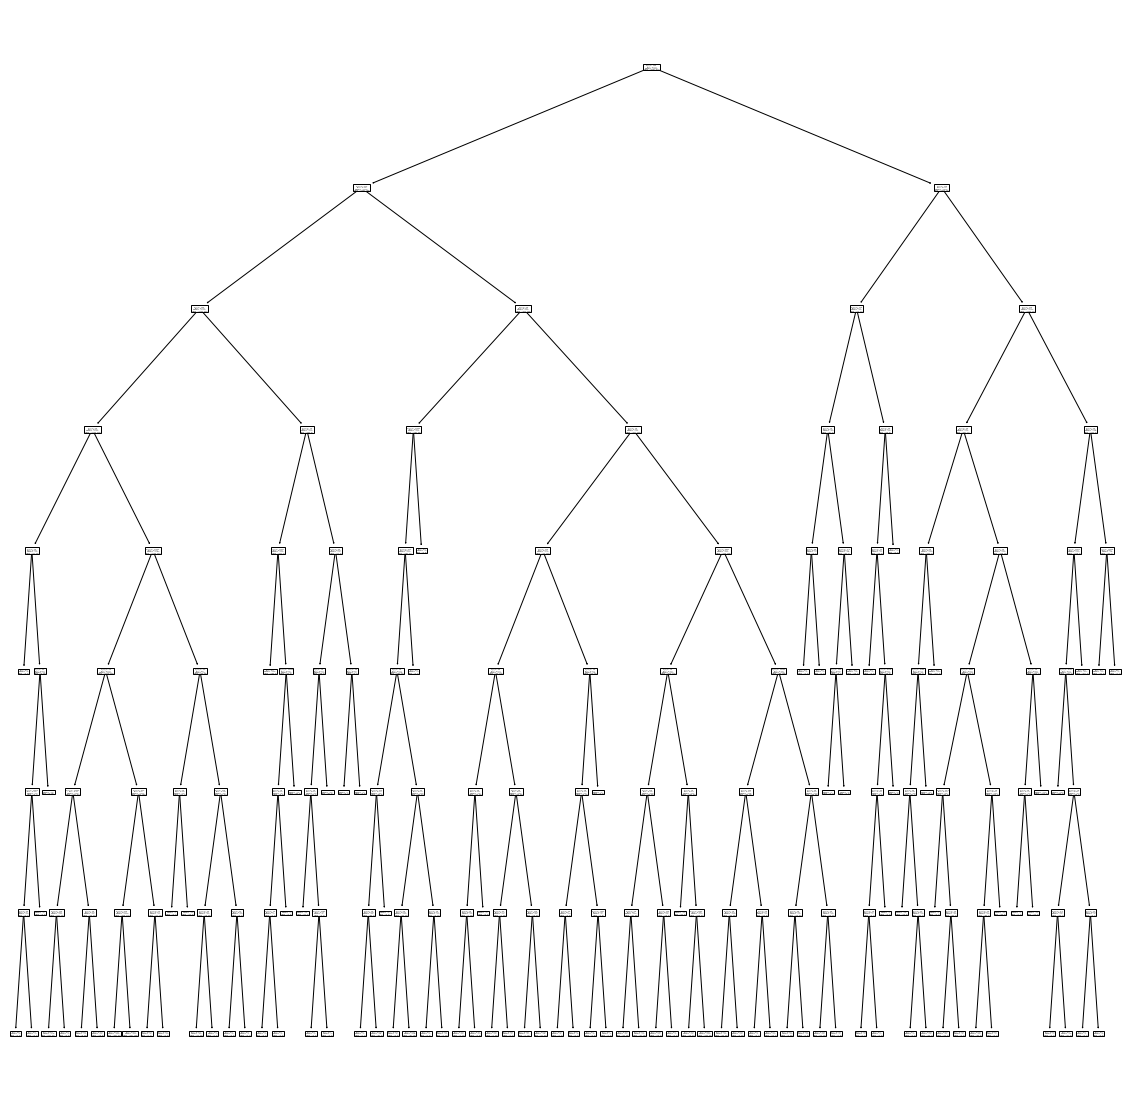

In [9]:
plt.figure(figsize=(20, 20))

tr.plot_tree(tree)

In [10]:
print(f'Train: {tree.score(X_train, y_train)}')
print(f'Test: {tree.score(X_test, y_test)}')

Train: 0.8880874825500232
Test: 0.8548837209302326


In [11]:
preds = tree.predict(X_test)
print(mtr.confusion_matrix(y_test, preds))

[[803  66]
 [ 90 116]]


plan:
1. cut hist df +
2. get emp dfs on 3 hist dfs +
* refactor extracting
* get
3. run tree +
4. learn caching +
5. split data and cache +
6. analyze feature importance for 1 month on 1 tree +
7. write to mentor +
8. run RF +
9. wait for mentor's answer
----------------------------
1. configure python notebook +
2. generate more features:
* fix wage
* find other implementations
3. fix dtypes
----------------------------
1. generate more features
2. read about aggregating
3. implement functions

In [12]:
import sklearn.ensemble as ens

In [13]:
rf = ens.RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
preds = rf.predict(X_test)
print(mtr.confusion_matrix(y_test, preds))

[[827  42]
 [102 104]]


In [15]:
importances = rf.feature_importances_

feature_importance = {}
features = X_train.columns.tolist()
for i, feature in enumerate(features):
    feature_importance[feature] = round(importances[i], 3)

feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))
print("Feature importance by sklearn\n")
for key, val in feature_importance.items():
    print(f'{key}: {val}\n')

Feature importance by sklearn

LastLevelPeriod: 0.208

MeanHourVacation: 0.146

MonthsOnProject: 0.14

PosLangLevel1: 0.081

ProjPosCount1: 0.065

ProjPosCount2: 0.054

PosLangLevel2: 0.049

ProjPosCount3: 0.047

WageQuant: 0.046

TimeWageRate: 0.042

MeanBonus1: 0.04

PosChanges: 0.022

MeanBonus2: 0.021

FormerPosMonths: 0.017

PosLangLevel3: 0.016

MeanBonus3: 0.005

RestLevel: 0.0

